In [1]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
#import os
#os.chdir("/content/drive/My Drive/Colab Notebooks/AMIT/")
#!ls

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# https://www.kaggle.com/code/jennifercrockett/marketing-analytics-eda-task-final/notebook
df = pd.read_csv('marketing_data.csv')
df.head(5).transpose()

,0,1,2,3,4
ID,1826,1,10476,1386,5371
Year_Birth,1970,1961,1958,1967,1989
Education,Graduation,Graduation,Graduation,Graduation,Graduation
Marital_Status,Divorced,Single,Married,Together,Single
Income,"$84,835.00","$57,091.00","$67,267.00","$32,474.00","$21,474.00"
Kidhome,0,0,0,1,1
Teenhome,0,0,1,1,0
Dt_Customer,6/16/14,6/15/14,5/13/14,5/11/14,4/8/14
Recency,0,0,0,0,0
MntWines,189,464,134,10,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

**Description of the dataset:**

*  AcceptedCmp1: If customer accepted the offer in 1st campaign
*  AcceptedCmp2: If customer accepted the offer in 2nd campaign
*  AcceptedCmp3: If customer accepted the offer in 3rd campaign
*  AcceptedCmp4: If customer accepted the offer in 4th campaign
*  AcceptedCmp5: If customer accepted the offer in 5th campaign
*  complain: If customer complained in last 2 years
*  DTCustomer: Date of customer's enrollment with the company
*  Education: level of education
*  Marital_Status: Marital status
*  Year_Birth: year of birth
*  Country: country
*  Kidhome: number of childrens in home
*  Teenhome: number of teenagers in
*  Income: yearly income
*  MntFishProducts: amount spent in fish products in last 2 years
*  MntMeatProducts: amount spent in meat products in last 2 years
*  MntFruits: amount spent in fruits products in last 2 years
*  MntSweetProducts: amount spent in sweet products in last 2 years
*  MntWineProducts: amount spent in wines in last 2 years
*  MntGoldProds: amount spent in gold products in last 2 years
*  NumDealsPurchases: number of purchases made with discounts
*  NumCatalogPurchases: number of purchases made using catalogs
*  NumStorePurchases: number of purchases made in store directly
*  NumWebPurchases: number of purchases made through company's website
*  NumWebVisitsMonths: number of visits to company's website in the last month
*  Recency: number of days since the last purchase
*  Response: If customer accepted the offer in last campaign










# **Check nulls**

In [4]:
missing_data=df.isna().sum()
missing_data

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

## **Check duplicates**

In [5]:
df.duplicated().sum()

0

# **remove spaces from columns names**

In [6]:
df.columns = df.columns.str.strip()


# **Check Data types**
* Income need to be float and remove $ and ,
* Dt_Customer need to be date


In [7]:
df['Income'] = df['Income'].str.replace(',', '')
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].astype(float)


C:\Users\waleed\AppData\Local\Temp\ipykernel_24072\165013098.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Income'] = df['Income'].str.replace('$', '')


In [8]:
df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'])
df["DATE_YEAR"] = df["Dt_Customer"].dt.year
df.drop(["Dt_Customer"],axis=1,inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

# **Target column classes**

In [10]:
df['Response'].unique()

array([1, 0], dtype=int64)

# **The categorical columns: Education, Marital_Status, and Counrty**

In [11]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [12]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

*  Alone, YOLO, and Absurd are unknown values with just 2 rows so, we can drop these rows




In [13]:
i = df[((df.Marital_Status == 'YOLO') | (df.Marital_Status =='Absurd') | (df.Marital_Status =='Alone'))].index
df=df.drop(i)

In [14]:
df['Country'].value_counts()


SP     1095
SA      337
CA      263
AUS     159
IND     147
GER     120
US      109
ME        3
Name: Country, dtype: int64

# **The unique values of each column**

In [15]:
for col in df:
    print(col + ':')
    print(df[col].unique())

ID:
[ 1826     1 10476 ...    22   528  4070]
Year_Birth:
[1970 1961 1958 1967 1989 1954 1947 1979 1959 1981 1969 1977 1960 1966
 1976 1965 1956 1975 1971 1986 1972 1974 1990 1987 1984 1968 1955 1983
 1973 1978 1952 1962 1964 1982 1963 1957 1980 1945 1949 1948 1953 1946
 1985 1992 1944 1951 1988 1950 1994 1993 1991 1893 1996 1995 1899 1943
 1941 1940 1900]
Education:
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
Marital_Status:
['Divorced' 'Single' 'Married' 'Together' 'Widow']
Income:
[84835. 57091. 67267. ... 46310. 65819. 94871.]
Kidhome:
[0 1 2]
Teenhome:
[0 1 2]
Recency:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
MntWines:
[ 189  464  134   10    6  336  769   78  384  450  140  431    3   16
   63   18   53    5  213  

# **Drop unnecessary features:**

In [16]:
df=df.drop(columns=['ID'])

In [17]:
df.head(5).transpose()

,0,1,2,3,4
Year_Birth,1970,1961,1958,1967,1989
Education,Graduation,Graduation,Graduation,Graduation,Graduation
Marital_Status,Divorced,Single,Married,Together,Single
Income,84835.0,57091.0,67267.0,32474.0,21474.0
Kidhome,0,0,0,1,1
Teenhome,0,0,1,1,0
Recency,0,0,0,0,0
MntWines,189,464,134,10,6
MntFruits,104,5,11,0,16
MntMeatProducts,379,64,59,1,24


## Define The numeric Values to Check outliers

In [18]:
list = ['NumStorePurchases','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumStorePurchases','Income','Year_Birth']

## Boxplots and distplot Functions To Check outliers

In [19]:
def boxplts(df)  :

    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Loop over the 27 features and plot a boxplot on each subplot
    for i, feature in enumerate(list):
        sns.boxplot(x=df[feature], ax=axes[i])

    # Remove empty subplots and adjust spacing between subplots
    for i in range(len(df.columns), len(axes)):
        fig.delaxes(axes[i])
    plt.tight_layout()

    # Show the plot
    plt.show()


In [20]:
def distributionplt(df):
        fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

        # Flatten the axes array for easier iteration
        axes = axes.flatten()

        # Loop over the 27 features and plot a boxplot on each subplot
        for i, feature in enumerate(list):
            sns.distplot(x=df[feature], ax=axes[i], color='blue', hist_kws={'color': 'blue', 'alpha': 0.4}, kde_kws={'color': 'red'})

        # Remove empty subplots and adjust spacing between subplots
        for i in range(len(df.columns), len(axes)):
            fig.delaxes(axes[i])
        plt.tight_layout()

        # Show the plot
        plt.show()

# **Check the distribution of data**

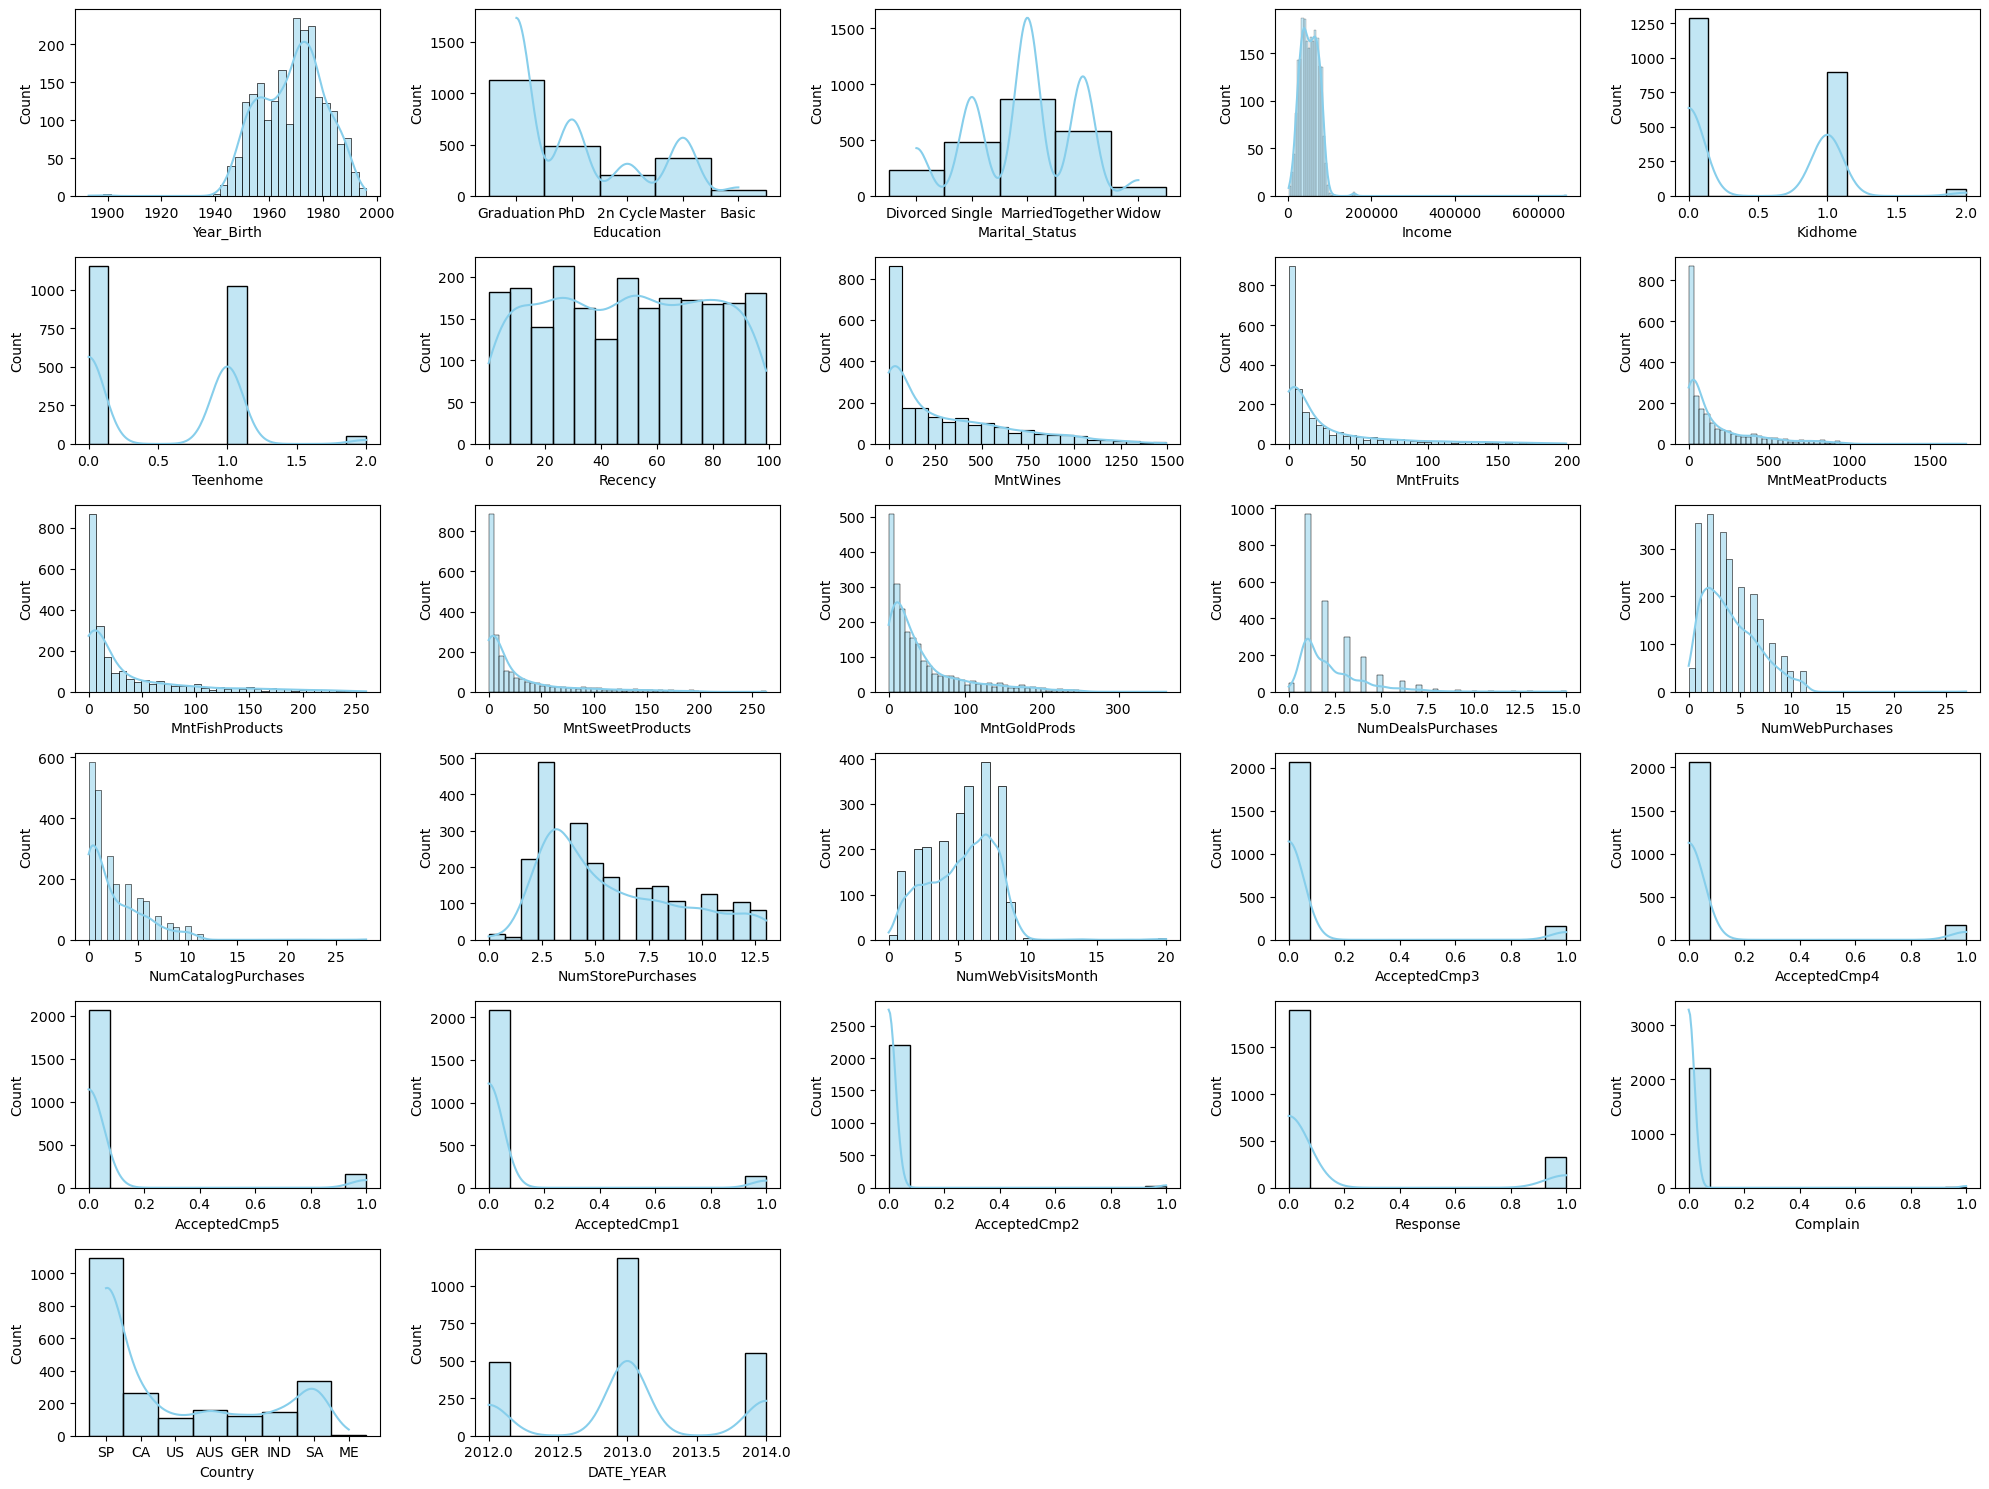

In [21]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop over the 27 features and plot a histogram on each subplot
for i, feature in enumerate(df.columns):
    sns.histplot(x=df[feature], ax=axes[i], color='skyblue',edgecolor='black', kde=True,alpha=0.5)

# Remove empty subplots and adjust spacing between subplots
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()

# Show the plot
plt.show()

# **Bivariate analysis**

**Questions for analysis:**
*  What are the average of purchases for each country?
*  What are the total number of Accepted campaigns in each country?
*  What is the relation between income and the different purchaces with respect to different education levels?

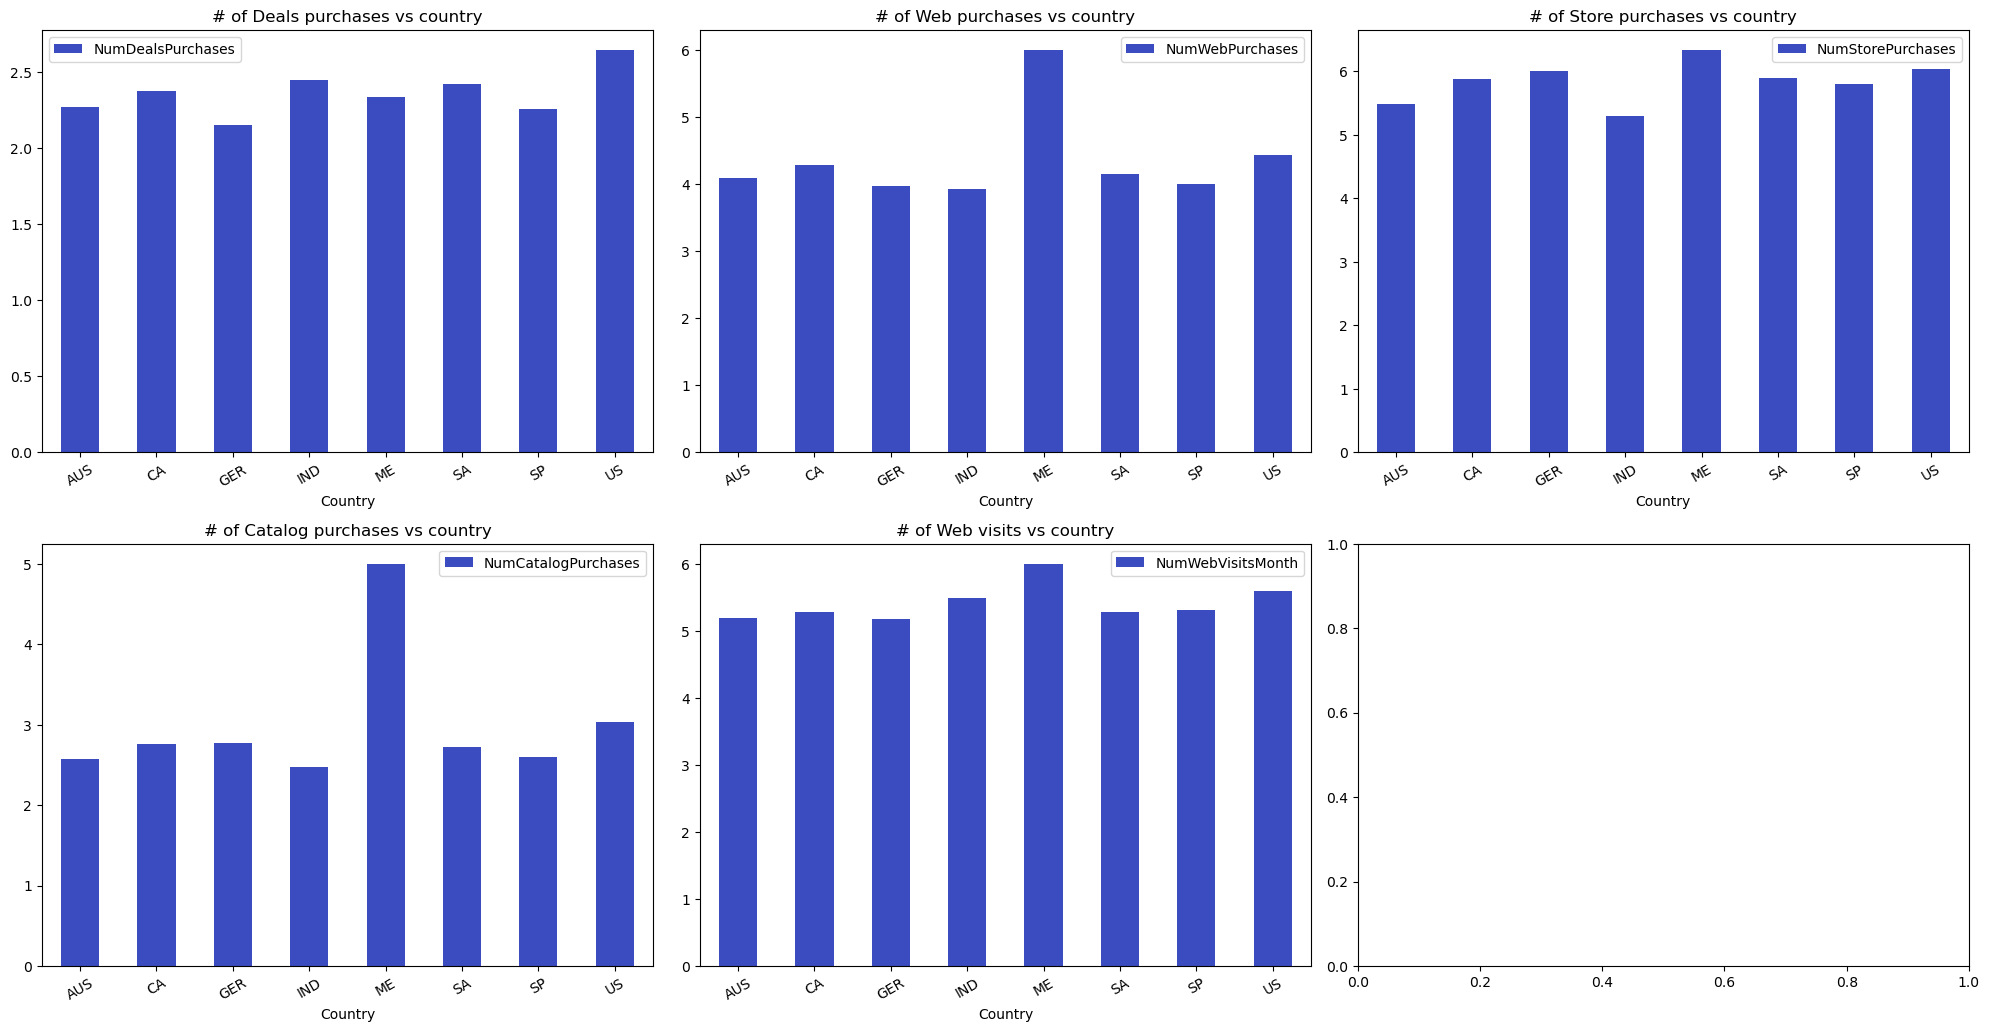

In [22]:
deals_purchases_by_country = df.groupby('Country').agg(NumDealsPurchases =('NumDealsPurchases','mean'))
web_purchases_by_country = df.groupby('Country').agg(NumWebPurchases =('NumWebPurchases','mean'))
store_purchases_by_country = df.groupby('Country').agg(NumStorePurchases =('NumStorePurchases','mean'))
catalog_purchases_by_country = df.groupby('Country').agg(NumCatalogPurchases =('NumCatalogPurchases','mean'))
web_visits_by_country = df.groupby('Country').agg(NumWebVisitsMonth =('NumWebVisitsMonth','mean'))

fig,axs=plt.subplots(nrows=3,ncols=3,figsize=(20,15))
axs = axs.flatten()

plt.title('Average of purchases vs Country')
deals_purchases_by_country.plot(kind='bar',ax=axs[0], title = '# of Deals purchases vs country', cmap='coolwarm', rot = 30);
web_purchases_by_country.plot(kind='bar',ax=axs[1], title = '# of Web purchases vs country', cmap='coolwarm', rot = 30);
store_purchases_by_country.plot(kind='bar',ax=axs[2], title = '# of Store purchases vs country', cmap='coolwarm', rot = 30);
catalog_purchases_by_country.plot(kind='bar',ax=axs[3], title = '# of Catalog purchases vs country', cmap='coolwarm', rot = 30);
web_visits_by_country.plot(kind='bar',ax=axs[4], title = '# of Web visits vs country', cmap='coolwarm', rot = 30);

# Remove empty subplots and adjust spacing between subplots
for i in range(6, len(axs)):
    fig.delaxes(axs[i])
plt.tight_layout()

# Show the plot
plt.show()

**Obseravtions:**
*  The highest average of # of web, catalog and store purchases in addition to web visits per month are from ME and US
*  The highest average of # of deals purchases from
*  Most purchases are done through web and store.

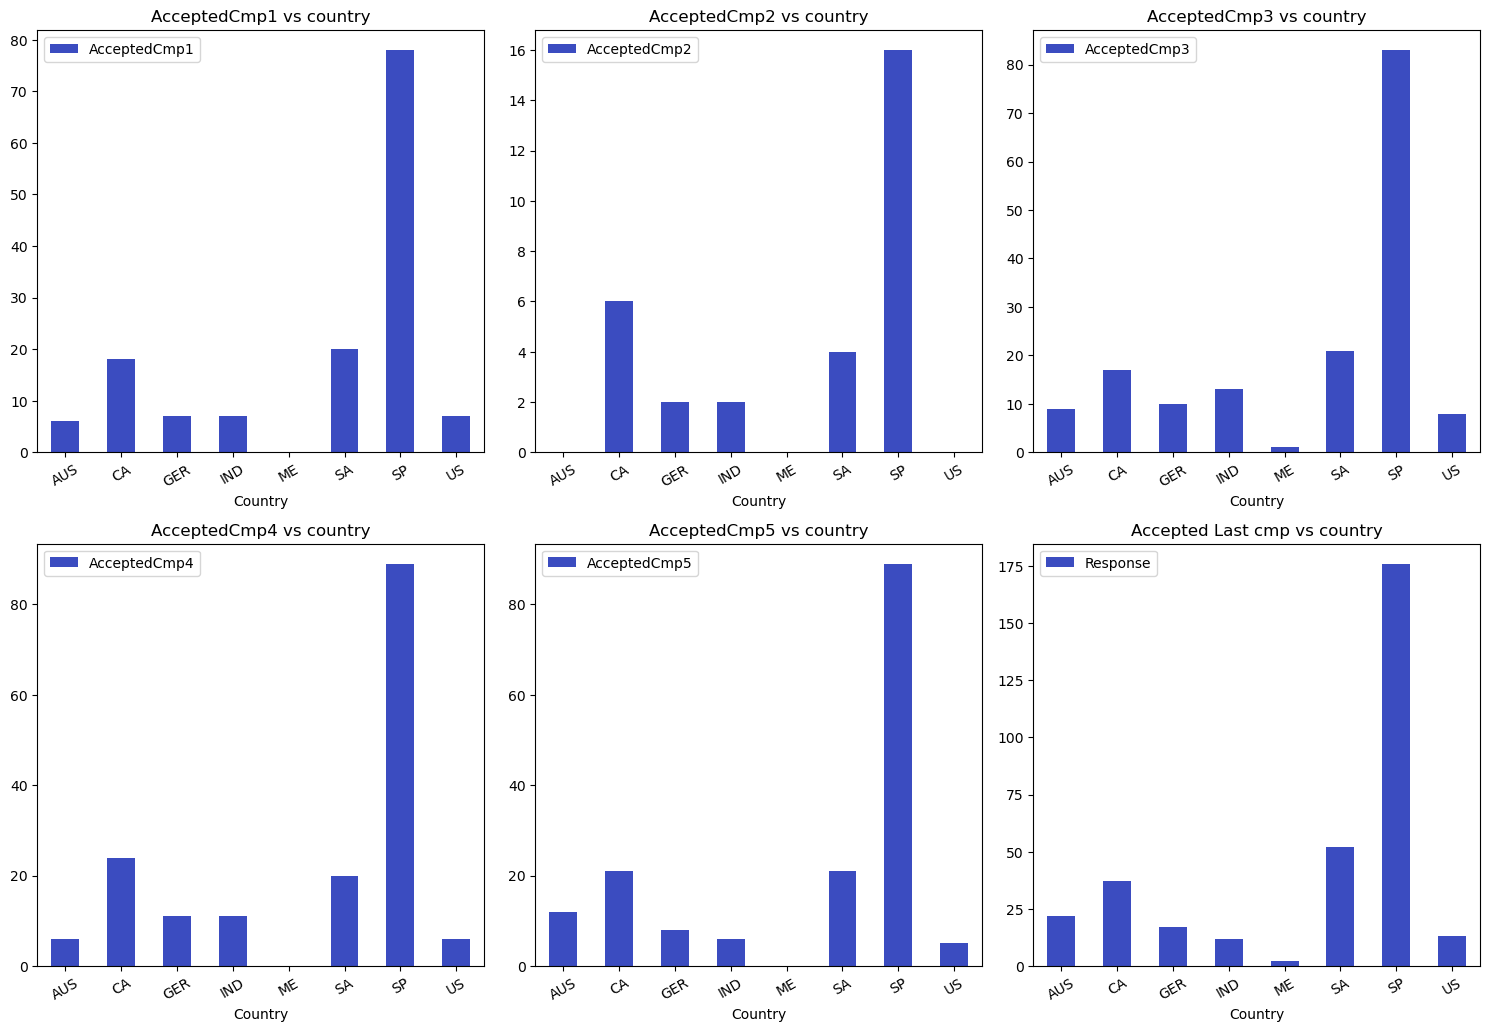

In [23]:
AcceptedCmp1_by_country = df.groupby('Country').agg(AcceptedCmp1 =('AcceptedCmp1','sum'))
AcceptedCmp2_by_country = df.groupby('Country').agg(AcceptedCmp2 =('AcceptedCmp2','sum'))
AcceptedCmp3_by_country = df.groupby('Country').agg(AcceptedCmp3 =('AcceptedCmp3','sum'))
AcceptedCmp4_by_country = df.groupby('Country').agg(AcceptedCmp4 =('AcceptedCmp4','sum'))
AcceptedCmp5_by_country = df.groupby('Country').agg(AcceptedCmp5 =('AcceptedCmp5','sum'))
last_cmp_by_country = df.groupby('Country').agg(Response =('Response','sum'))

fig,axs=plt.subplots(nrows=3,ncols=3,figsize=(15,15))
axs = axs.flatten()

plt.title('sum of Accepted campaigns vs Country')
AcceptedCmp1_by_country.plot(kind='bar',ax=axs[0], title = 'AcceptedCmp1 vs country', cmap='coolwarm', rot = 30);
AcceptedCmp2_by_country.plot(kind='bar',ax=axs[1], title = 'AcceptedCmp2 vs country', cmap='coolwarm', rot = 30);
AcceptedCmp3_by_country.plot(kind='bar',ax=axs[2], title = 'AcceptedCmp3 vs country', cmap='coolwarm', rot = 30);
AcceptedCmp4_by_country.plot(kind='bar',ax=axs[3], title = 'AcceptedCmp4 vs country', cmap='coolwarm', rot = 30);
AcceptedCmp5_by_country.plot(kind='bar',ax=axs[4], title = 'AcceptedCmp5 vs country', cmap='coolwarm', rot = 30);
last_cmp_by_country.plot(kind='bar',ax=axs[5], title = 'Accepted Last cmp vs country', cmap='coolwarm', rot = 30);

# Remove empty subplots and adjust spacing between subplots
for i in range(6, len(axs)):
    fig.delaxes(axs[i])
plt.tight_layout()

# Show the plot
plt.show()

**Obseravtions:**
*  Most accepted campaigns and the last accepted campaign are from Spain

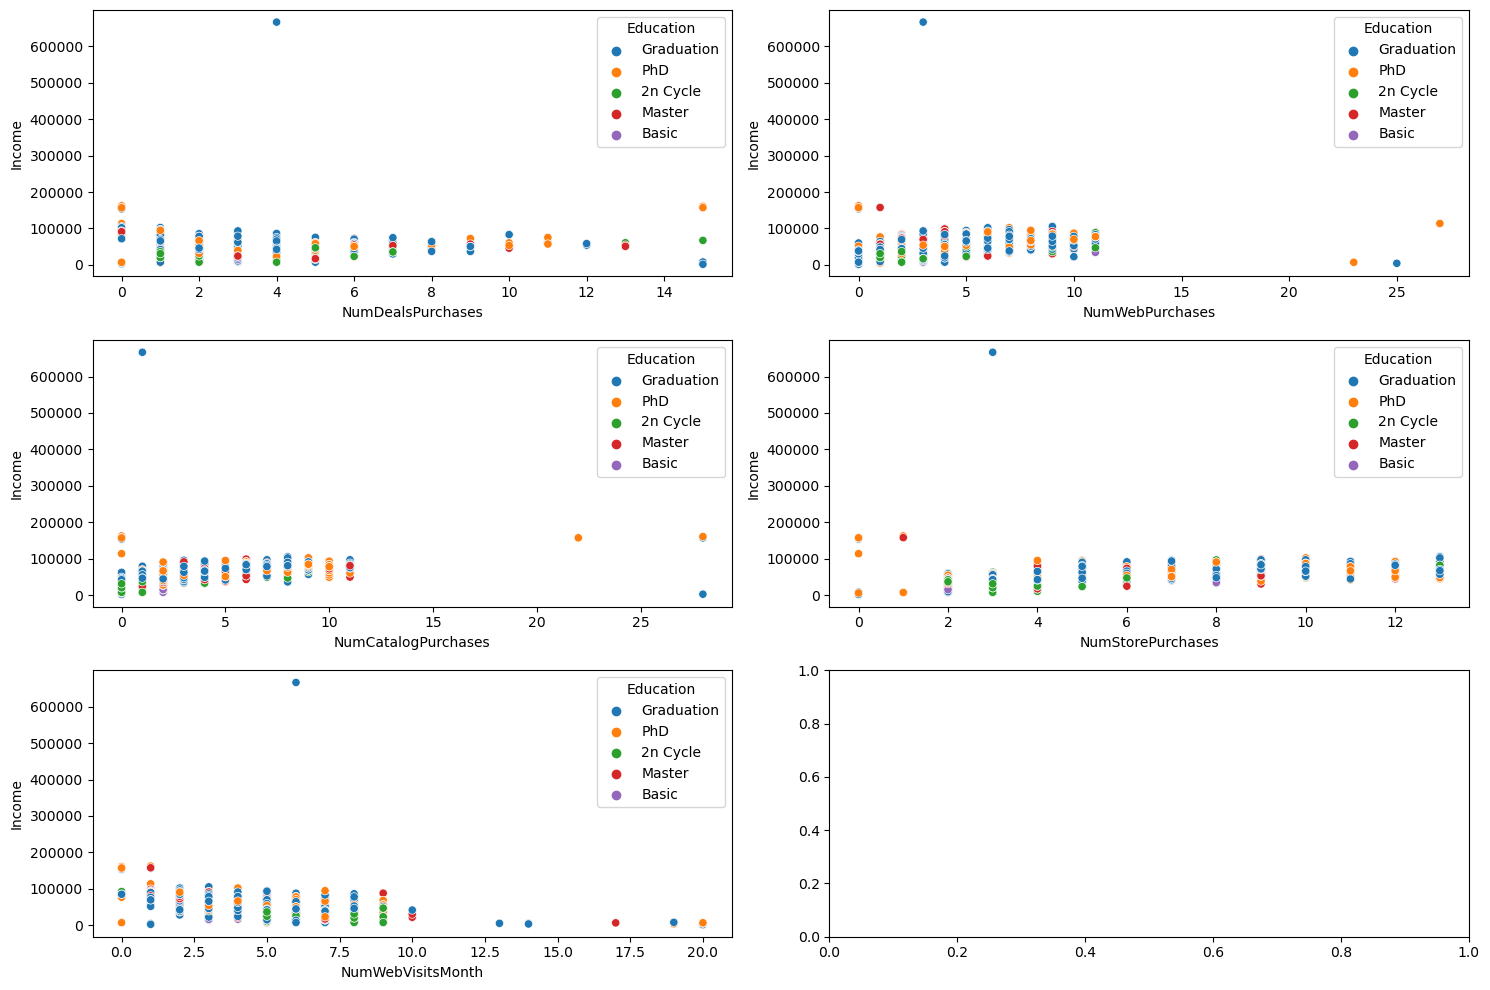

In [24]:
df_2=df[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Education','Income']]

fig,axs=plt.subplots(nrows=3,ncols=2,figsize=(15,10))
axs = axs.flatten()

sns.scatterplot(data=df_2,ax=axs[0],x="NumDealsPurchases",y='Income',hue="Education")
sns.scatterplot(data=df_2,ax=axs[1],x="NumWebPurchases",y='Income',hue="Education")
sns.scatterplot(data=df_2,ax=axs[2],x="NumCatalogPurchases",y='Income',hue="Education")
sns.scatterplot(data=df_2,ax=axs[3],x="NumStorePurchases",y='Income',hue="Education")
sns.scatterplot(data=df_2,ax=axs[4],x="NumWebVisitsMonth",y='Income',hue="Education")

# Remove empty subplots and adjust spacing between subplots
for i in range(len(df.columns), len(axs)):
    fig.delaxes(axs[i])
plt.tight_layout()

# Show the plot
plt.show()

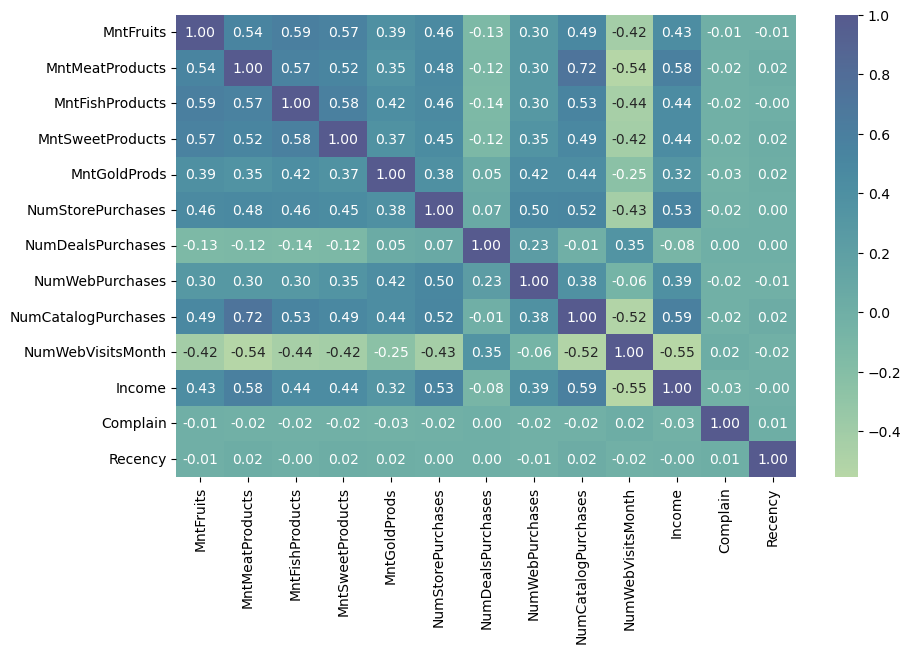

In [25]:
# Correlation between continuous columns

corr=df[['MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumStorePurchases', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases','NumWebVisitsMonth','Income','Complain','Recency']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr,annot=True , cmap='crest',alpha=0.8,fmt='.2f')
plt.show()


**Observatios:**
* AmnMeatProducts highly correlateeed to NumCatalogPurchases.
* Recency and complain have no correlation with the other features.


---




# Dealing with Outliers

### Visualization Data Before Removing outliers

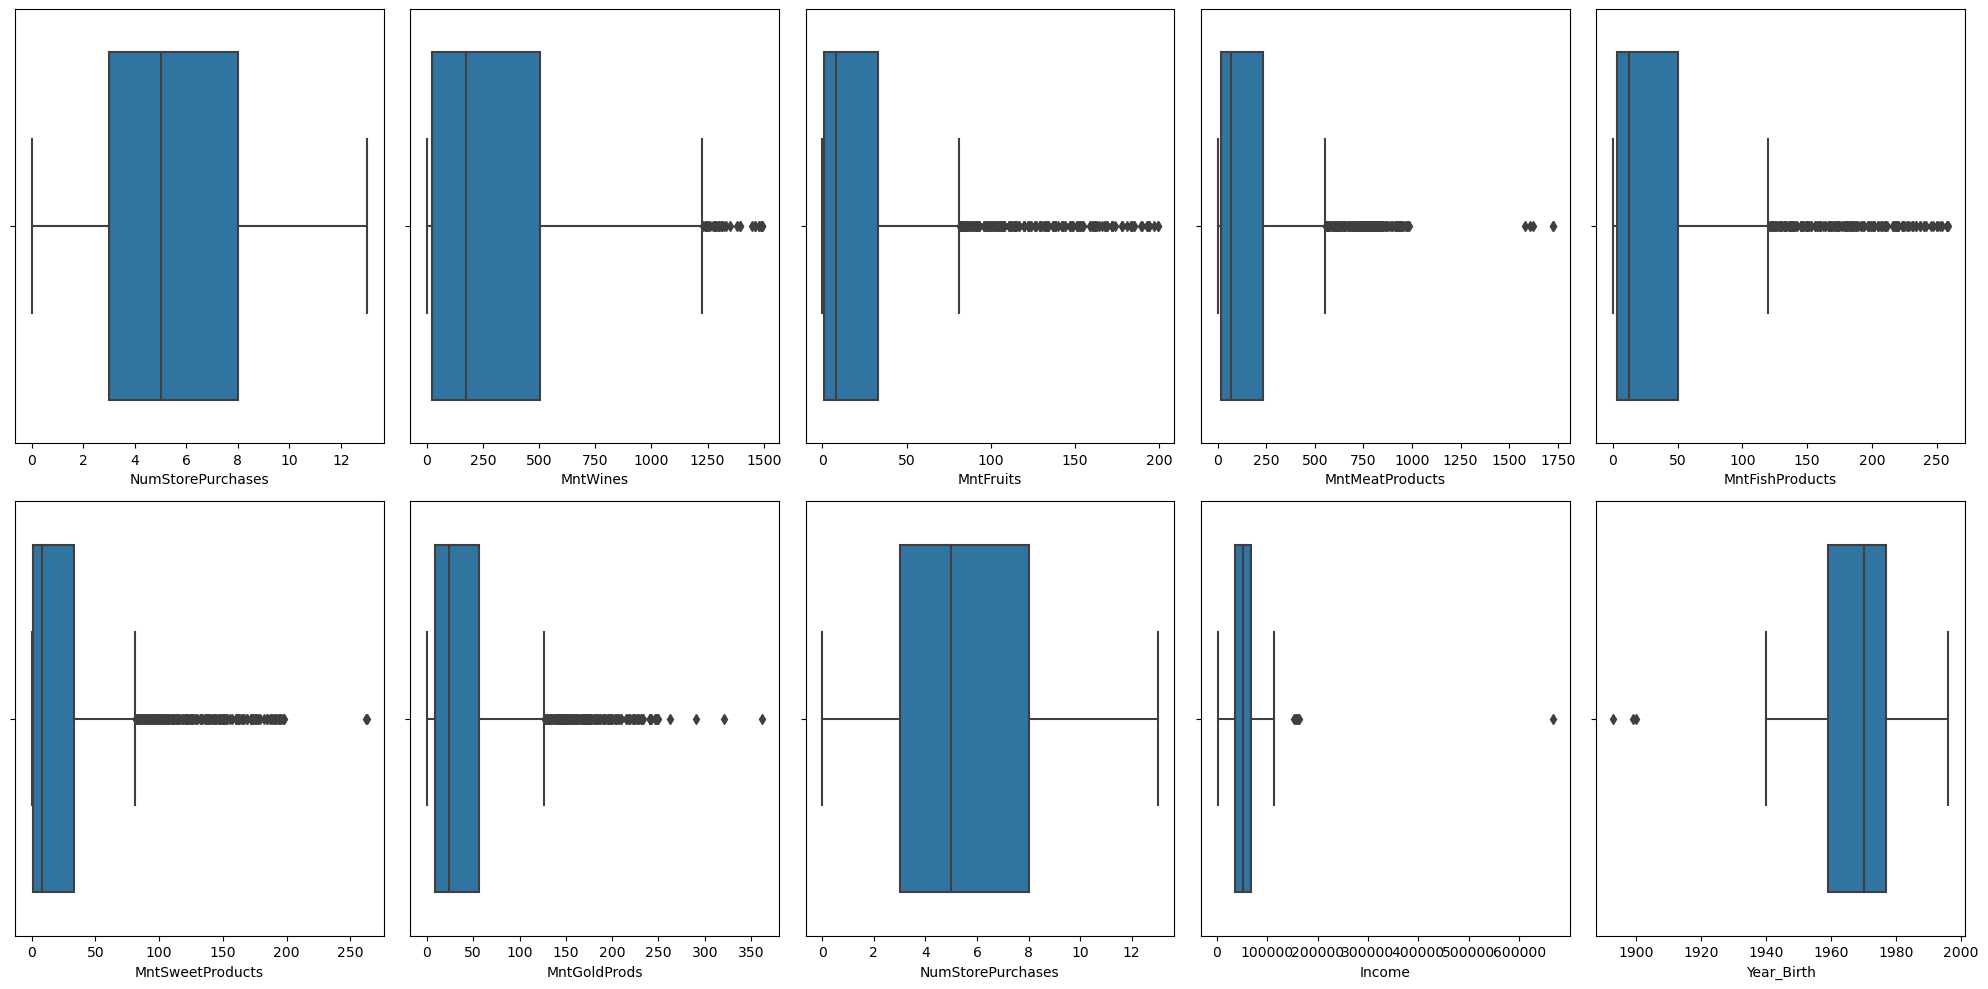

In [26]:
bxplt= boxplts(df)

**Observations:**
* **The columns: Income and all Amount spent columns have outliers**

c:\Users\waleed\Downloads\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\waleed\Downloads\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\waleed\Downloads\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

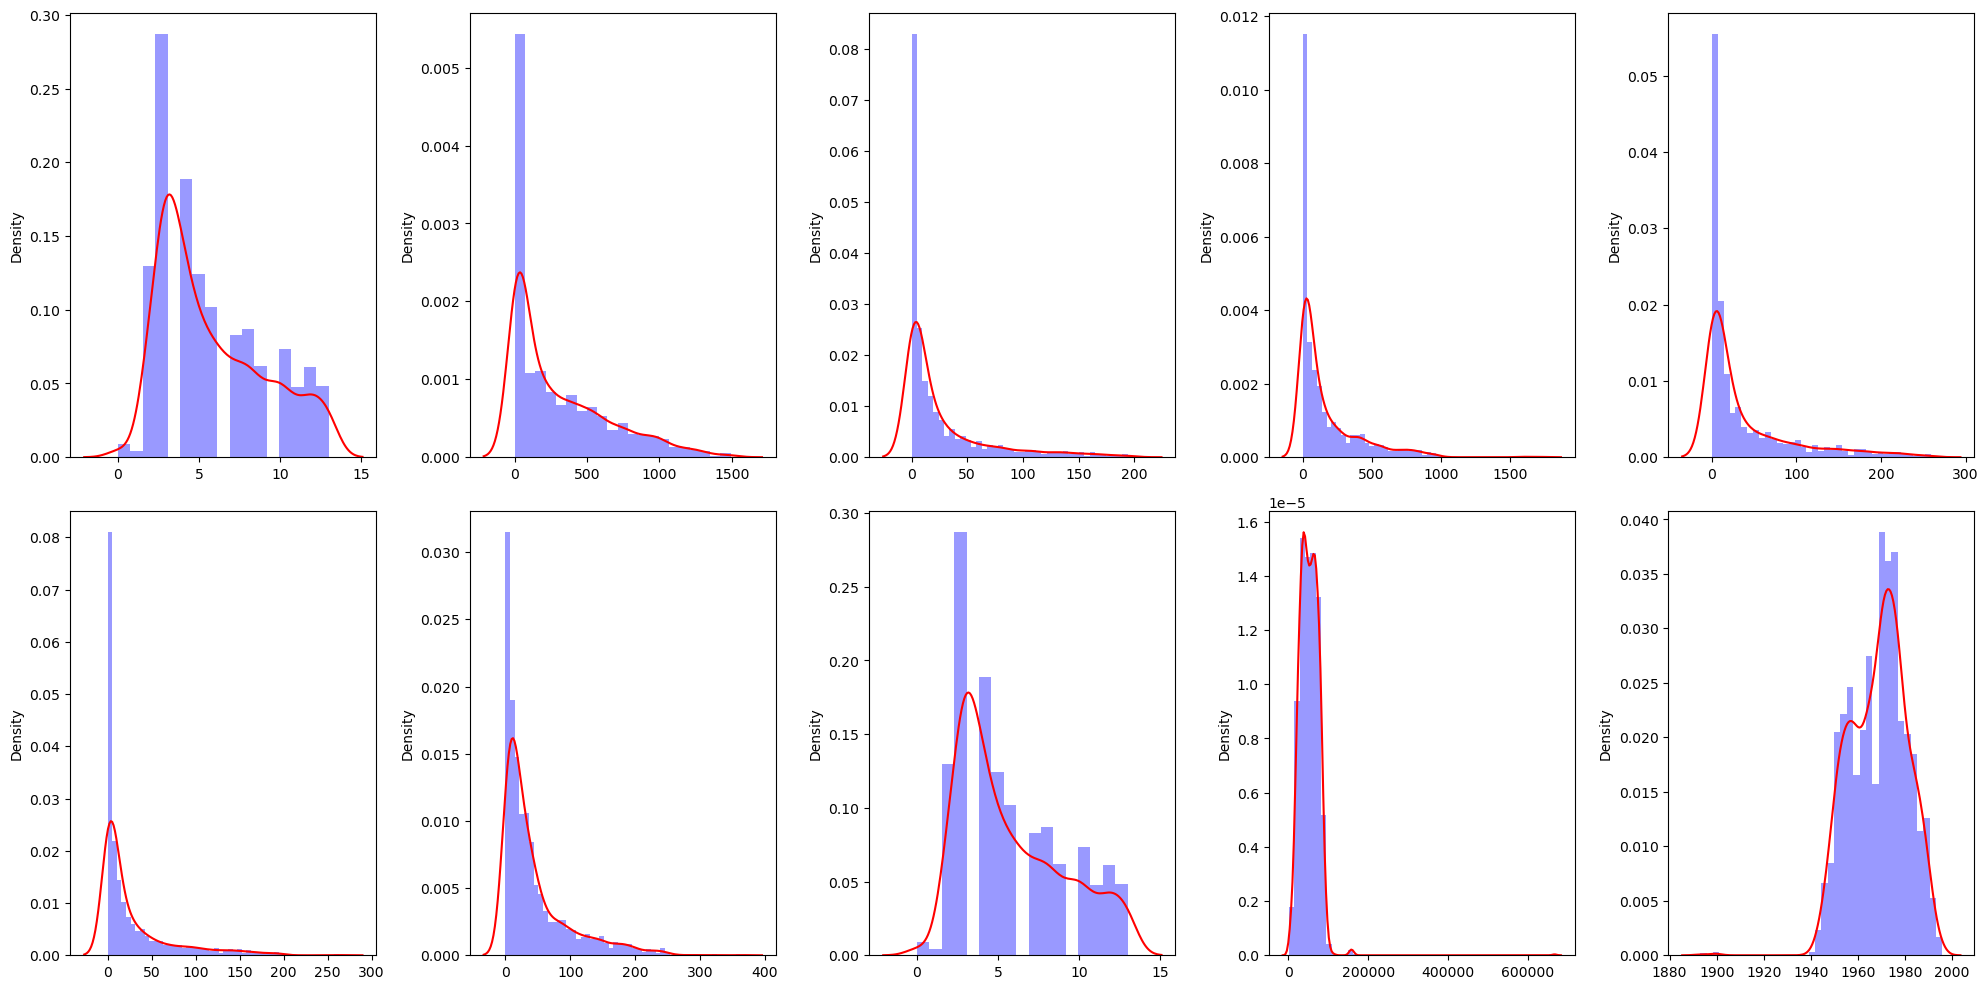

In [27]:
dist=distributionplt(df)

## Removing Outliers

### define Minthreshold and MaxThreshold

In [28]:
for i in (list)  :
    min_thresold, max_thresold = df[i].quantile([0.001, 0.999])
    print('Minthreshold is : {:.2f} '.format(min_thresold),'Maxthreshold is : {:.2f}'.format(max_thresold))
    df = df[(df[i]<max_thresold) & (df[i]>min_thresold)]


Minthreshold is : 0.00  Maxthreshold is : 13.00
Minthreshold is : 0.00  Maxthreshold is : 1491.20
Minthreshold is : 0.00  Maxthreshold is : 194.00
Minthreshold is : 1.00  Maxthreshold is : 1153.46
Minthreshold is : 0.00  Maxthreshold is : 258.00
Minthreshold is : 0.00  Maxthreshold is : 196.47
Minthreshold is : 0.00  Maxthreshold is : 257.26
Minthreshold is : 1.34  Maxthreshold is : 12.00
Minthreshold is : 7500.00  Maxthreshold is : 101327.78
Minthreshold is : 1910.11  Maxthreshold is : 1994.00


### visualization Data after removing outliers

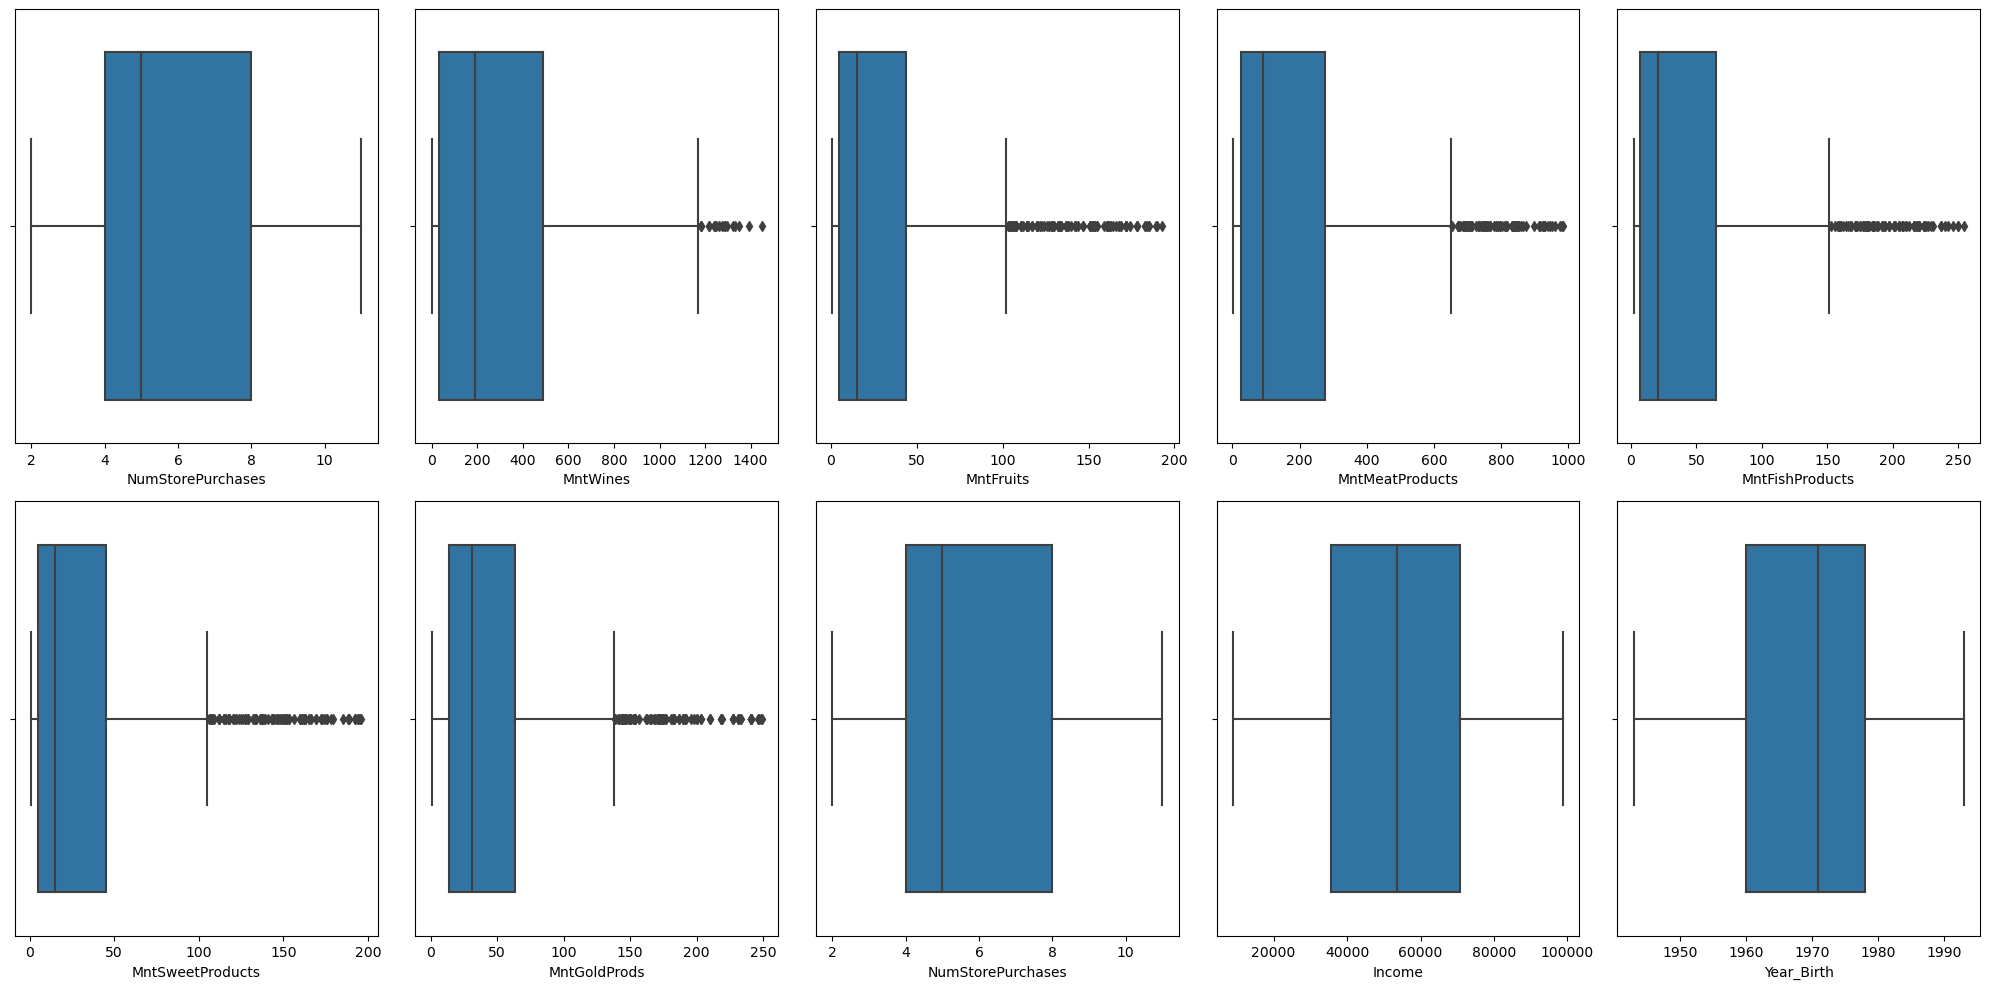

In [29]:
bx=boxplts(df)

c:\Users\waleed\Downloads\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\waleed\Downloads\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\waleed\Downloads\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

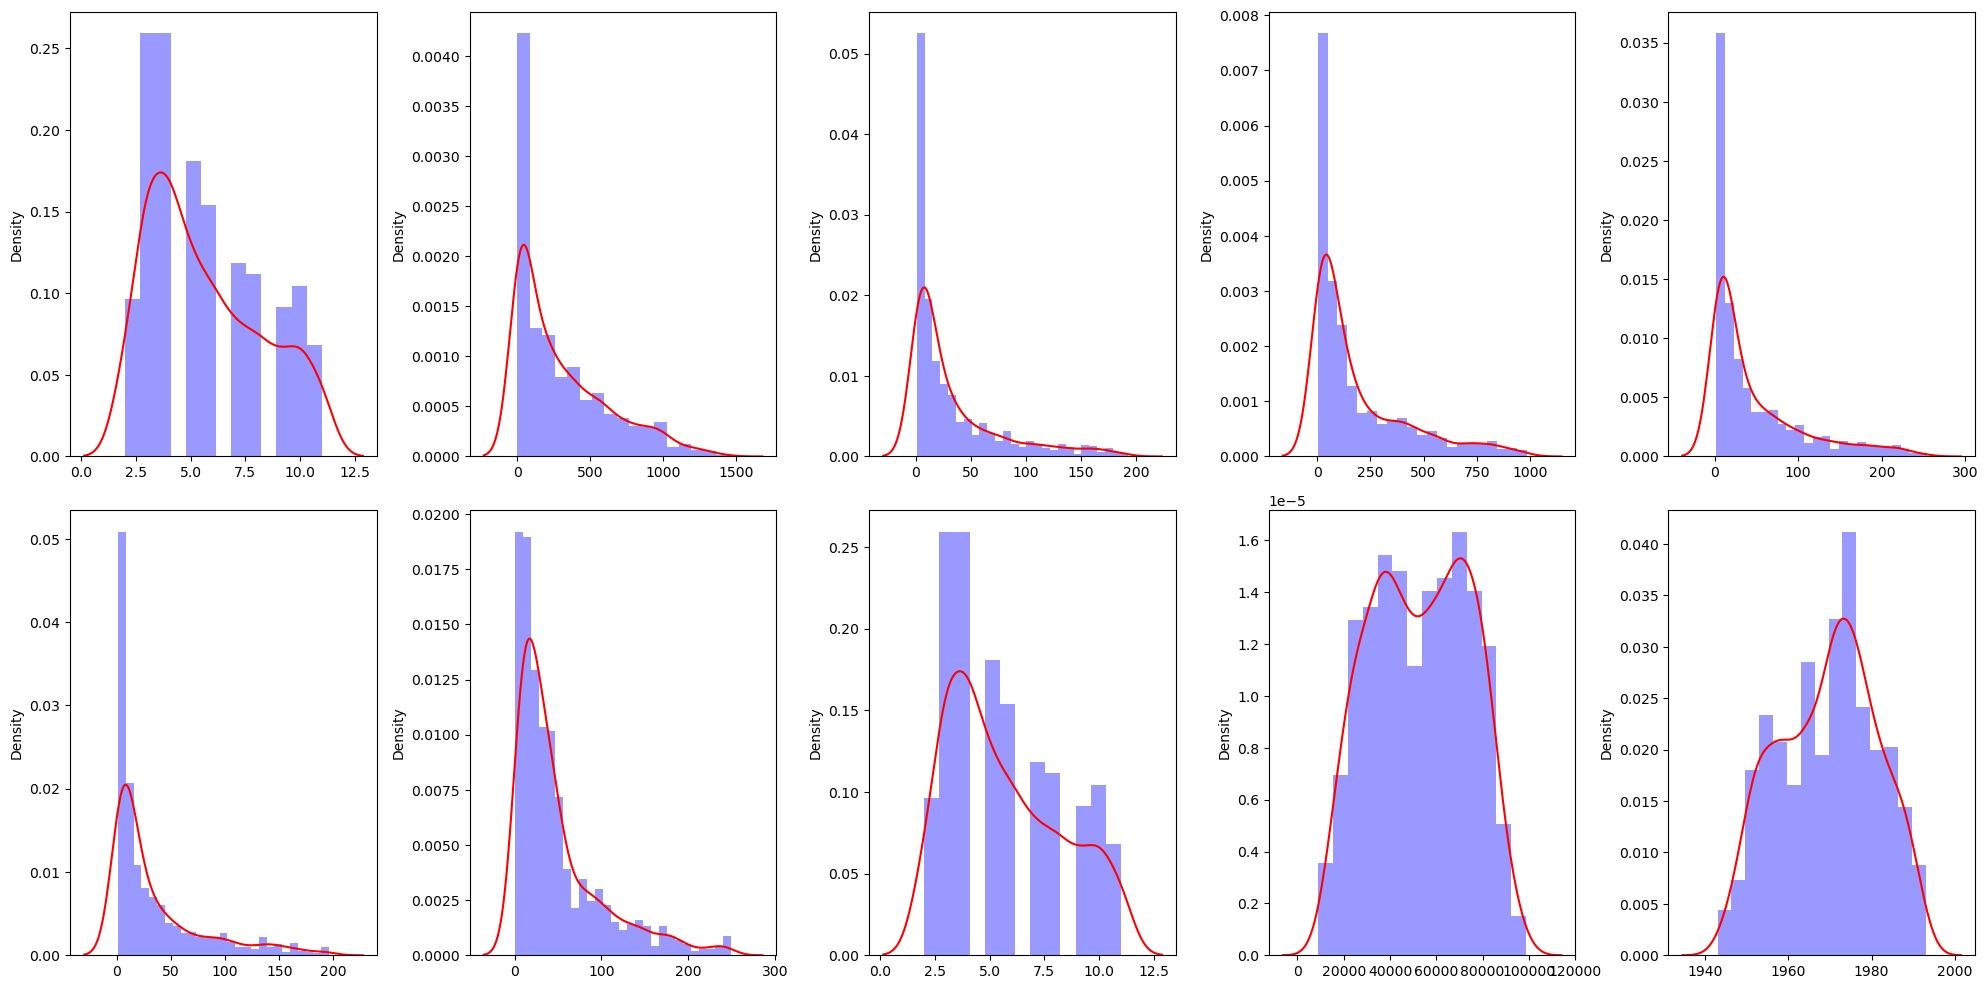

In [30]:
distr= distributionplt(df)



*   **Most value in all columns is zero. also, we need to scale data**


---




## correlation Betweem Features

# **Preprocessing**


*   **Deal with nulls in 'Income' column using median function**


In [31]:
df['Income'] = df['Income'].fillna(df['Income'].median())


**Check the outliers in 'Income' column**




* **Income has outliers. There is one row with income>170000$. We need to remove it.**
* **A solution: Scale. We can apply the Standard scalar function.**

In [32]:
len(df[df['Income'] > 170000])
[df[df['Income']>170000]]

[Empty DataFrame
 Columns: [Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Response, Complain, Country, DATE_YEAR]
 Index: []
 
 [0 rows x 27 columns]]

In [33]:
df = df.drop(df[df.Income > 170000].index)


Text(0.5, 0, 'Income')

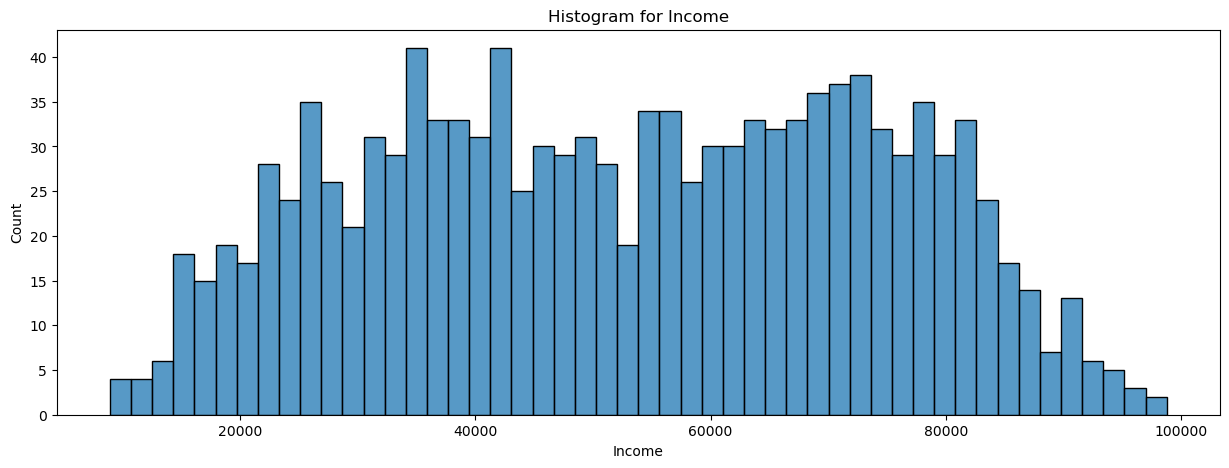

In [34]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(df['Income'], bins=50)
plt.title('Histogram for Income')
plt.xlabel('Income')


In [35]:
df.columns.all

<bound method Index.all of Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'DATE_YEAR'],
      dtype='object')>

# **Label encoding**
*  The categorical columns are: Education, Marital_Status, and Country
*  We can use label encoder.



In [36]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Education'
df['Education']= label_encoder.fit_transform(df['Education'])

# Encode labels in column 'Marital_Status'.
df['Marital_Status']= label_encoder.fit_transform(df['Marital_Status'])

# Encode labels in column 'Country'.
new = pd.get_dummies(df['Country'])

# Concatenate the original DataFrame with the dummy variables
df = pd.concat([df, new], axis=1)

# Drop the original categorical feature if desired
df = df.drop('Country', axis=1)

In [37]:
X= df.drop(['Response'],axis=1)
Y= df['Response']

# Checking unbalance of Data

## Visualization the Data Count

c:\Users\waleed\Downloads\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

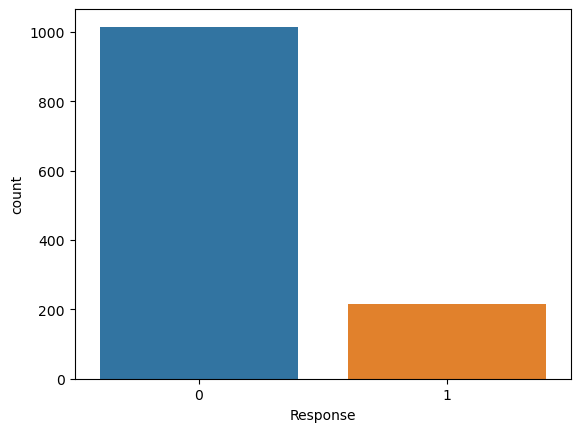

In [38]:
sns.countplot(Y)

### We get we have unbalance Data so we applying RandomoverSampling

In [39]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=0.7,random_state=42)

x, y = ros.fit_resample(X, Y)


### visualization Datacount After Applying RandomOverSampling

c:\Users\waleed\Downloads\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

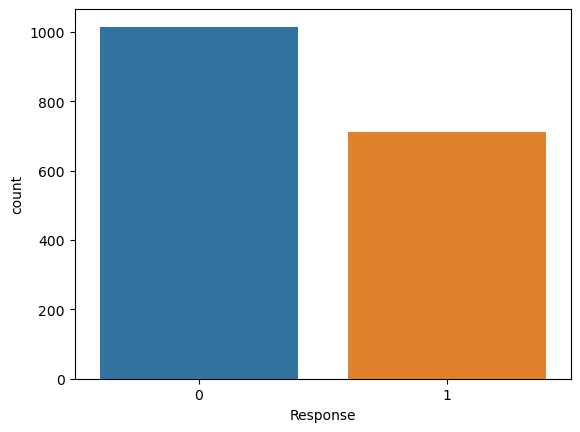

In [40]:
sns.countplot(y)

# Spliting Data

### importing Train_Test_split to split data to train , valid and Test

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [42]:
print(len(x_train))
print(len(x_test))
print(len(y_train))

1207
518
1207


# Dimensionality Reduction

### Applying StandardScaler

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)


### Applying PCA method for Dimension reduction

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
x_train_pca= pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)


# Building our Model

### GridSearchCV function for Tunning HyperParameters for Models

In [45]:
from sklearn.model_selection import GridSearchCV
def gridsearch(model,params,x_train,y_train):
    grid_search = GridSearchCV(model,params,cv=5,n_jobs=-1)
    grid_search.fit(x_train, y_train)

    print((grid_search.best_params_))


### All Metrics Function

In [46]:
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score,recall_score,roc_auc_score,f1_score,classification_report,roc_curve,precision_recall_curve,average_precision_score
def metrics(y_test,y_pred):
    conf_mat= confusion_matrix(y_test,y_pred)
    acc=accuracy_score(y_test,y_pred)
    percision=precision_score(y_test,y_pred)
    recall= recall_score(y_test,y_pred)
    roc_acc= roc_auc_score(y_test,y_pred)
    f1_sc= f1_score(y_test,y_pred)
    classi=classification_report(y_test,y_pred,output_dict=True)
    print(classification_report(y_test,y_pred))
    print(conf_mat)
    print('The Model Accuaracy is : {:.2f}'.format(acc))
    print('The percision score of model is: {:.2f}'.format(percision))
    print('The recall score is :  {}'.format(recall))
    print('The roc score is : {:.2f}'.format(roc_acc))
    print('The F1_score of model is : {:.2f}'.format(f1_sc))
    return conf_mat,acc,percision,recall,roc_acc,f1_sc,classi

### Visualization Metrics Function

In [47]:
import random
def visualize(conf,roc,classification,y_test,y_pred):
    #Confusion Matrix
    plt.figure(figsize=(8, 6))
    mylist=['plasma','Blues','GnBu','viridis','plasma','inferno','OrRd']
    alpha=[0.2 ,0.6,0.8 ,0.5]
    color=random.choice(mylist)
    alp=random.choice(alpha)

    sns.heatmap(conf,annot=True,fmt='d',cmap=color,alpha=alp)
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    #################################################################
    # roc curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc))
    plt.plot([0 , 1], [0 , 1], linestyle='--')

    # add labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.show()
    ###################################################################
    # classification report
    css = pd.DataFrame(classification).transpose()


    # Create a heatmap of the classification report
    sns.heatmap(css, annot=True, cmap=color , alpha = alp)
    plt.title('classification_report')
    plt.show()

    #############################################################
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    avg = average_precision_score(y_test, y_pred)
    plt.plot(recall, precision, label='Precision-Recall Curve (AP = {})'.format(avg))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')

    plt.legend()

    plt.show()
    ##########################################################################
    sns.countplot(y_pred)
    plt.show()




# classifications Model

## 1- KNN

### applying GridSearch for get Best parameters

In [48]:
from sklearn.neighbors import KNeighborsClassifier
param={'n_neighbors':[3,5,7,9,11],'weights':['uniform','distance']}
knn=KNeighborsClassifier()
gridsearch(knn,param,x_train_pca,y_train)

{'n_neighbors': 11, 'weights': 'distance'}


In [49]:
knn=KNeighborsClassifier(n_neighbors=11,weights='distance')
knn.fit(x_train_pca,y_train)
knn_pred=knn.predict(x_test_pca)


### Calling Metrics Function

In [50]:
conf_knn,acc_knn,pre_knn,rec_knn,roc_knn,f1_knn,class_knn=metrics(y_test,knn_pred)

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       310
           1       0.82      0.99      0.90       208

    accuracy                           0.91       518
   macro avg       0.91      0.92      0.91       518
weighted avg       0.92      0.91      0.91       518

[[266  44]
 [  3 205]]
The Model Accuaracy is : 0.91
The percision score of model is: 0.82
The recall score is :  0.9855769230769231
The roc score is : 0.92
The F1_score of model is : 0.90


### Calling Visualization Function

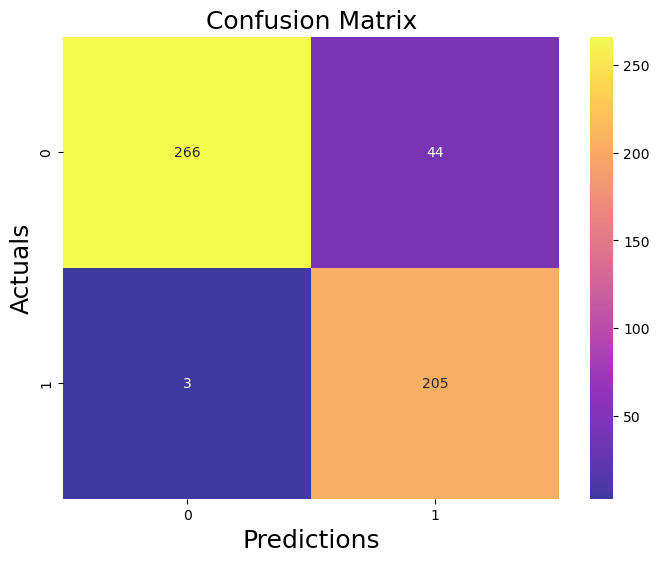

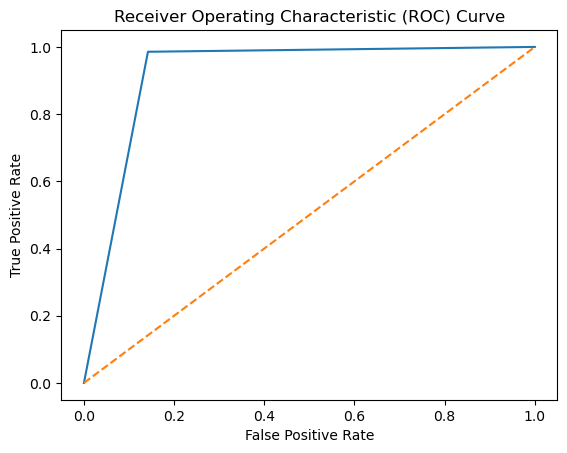

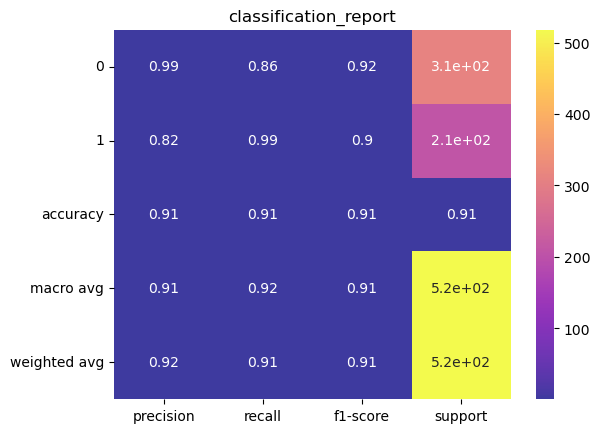

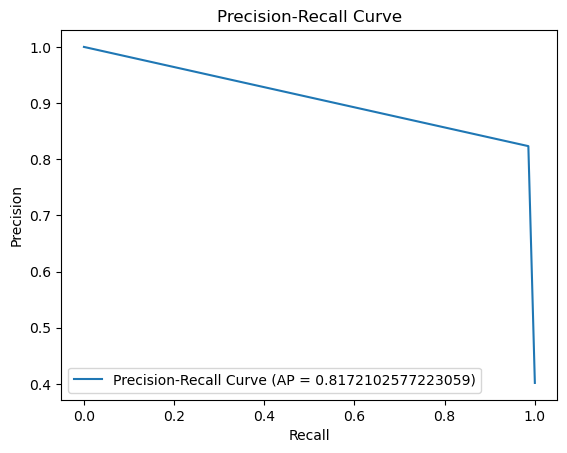

c:\Users\waleed\Downloads\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


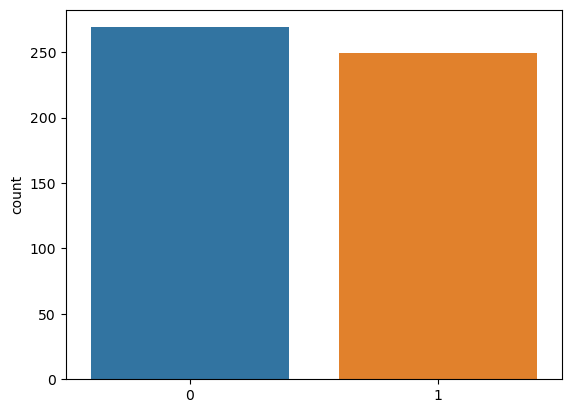

In [51]:
visualize(conf_knn,roc_knn,class_knn,y_test,knn_pred)

 ## 2- Logstic Regression

### Calling GridSearchCV function

In [52]:
from sklearn.linear_model import LogisticRegression
log= LogisticRegression()
param={'penalty':['l1','l2']}
gridsearch(log,param,x_train_pca,y_train)


{'penalty': 'l2'}


c:\Users\waleed\Downloads\New folder\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\waleed\Downloads\New folder\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\waleed\Downloads\New folder\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\waleed\Downloads\New folder\lib\site-packages\sklearn\linear_model\_logistic.py", line 44

### Calling Metrics Fuctions

In [53]:
log=LogisticRegression(penalty='l2')
log.fit(x_train_pca,y_train)
log_pred=log.predict(x_test_pca)
conf_log,acc_log,pre_log,rec_log,roc_log,f1_log,class_log=metrics(y_test,log_pred)

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       310
           1       0.76      0.72      0.74       208

    accuracy                           0.80       518
   macro avg       0.79      0.78      0.79       518
weighted avg       0.80      0.80      0.80       518

[[263  47]
 [ 58 150]]
The Model Accuaracy is : 0.80
The percision score of model is: 0.76
The recall score is :  0.7211538461538461
The roc score is : 0.78
The F1_score of model is : 0.74


### Calling Visualization function

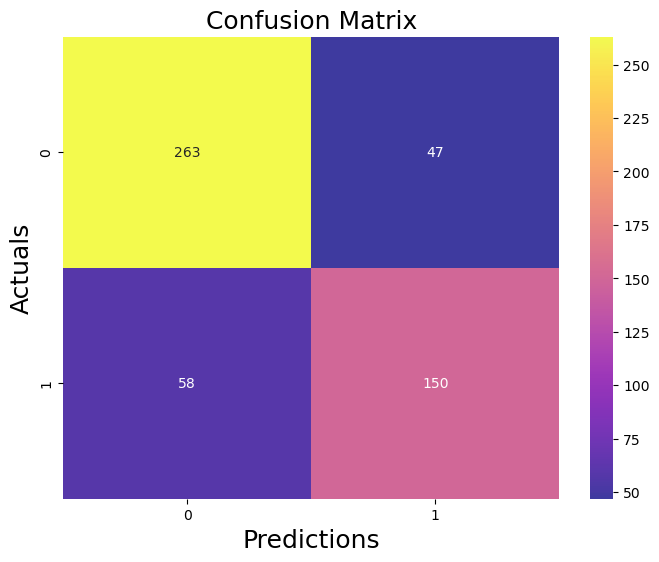

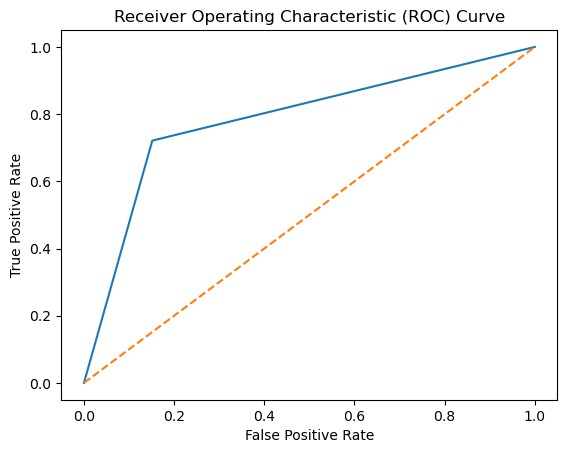

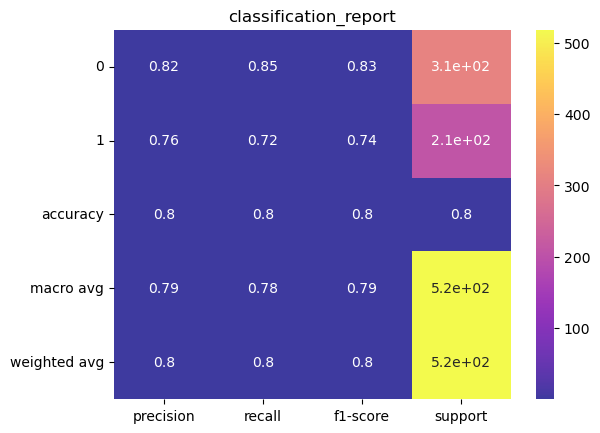

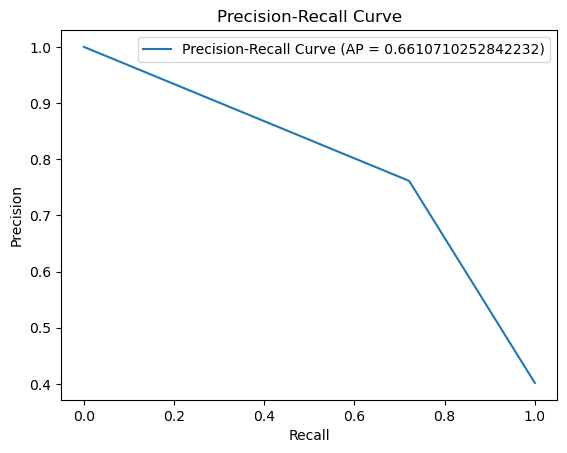

c:\Users\waleed\Downloads\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


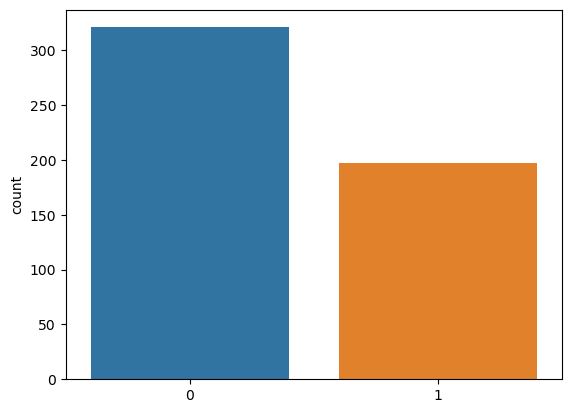

In [54]:
visualize(conf_log,roc_log,class_log,y_test,log_pred)

## 3- DecisionTree Classifier

### Calling GridSearchCV function

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier()
param={'criterion':['gini','entropy'],
           'max_depth':[5,7,9,10,15],'min_samples_leaf':[4,7,10,12]}
gridsearch(dt,param,x_train_pca,y_train)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 4}


### Calling Metrics Function

In [56]:
dt =DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_leaf=4)
dt.fit(x_train_pca,y_train)
dt_pred=dt.predict(x_test_pca)
conf_dt,acc_dt,pre_dt,rec_dt,roc_dt,f1_dt,class_dt=metrics(y_test,dt_pred)



              precision    recall  f1-score   support

           0       0.84      0.81      0.82       310
           1       0.73      0.76      0.75       208

    accuracy                           0.79       518
   macro avg       0.78      0.79      0.79       518
weighted avg       0.80      0.79      0.79       518

[[252  58]
 [ 49 159]]
The Model Accuaracy is : 0.79
The percision score of model is: 0.73
The recall score is :  0.7644230769230769
The roc score is : 0.79
The F1_score of model is : 0.75


### Calling The Visualize Function

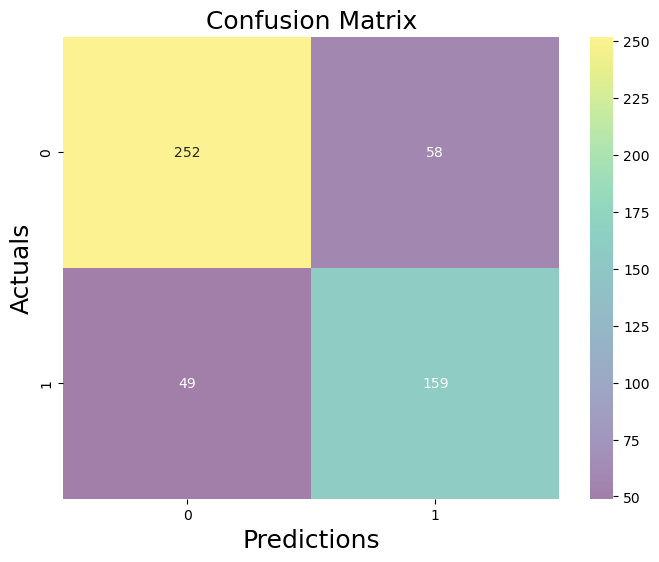

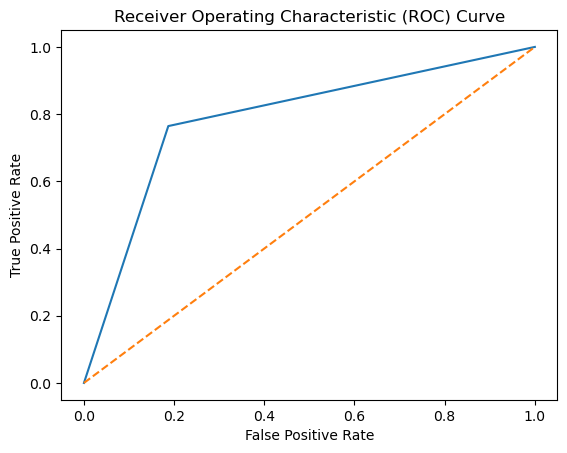

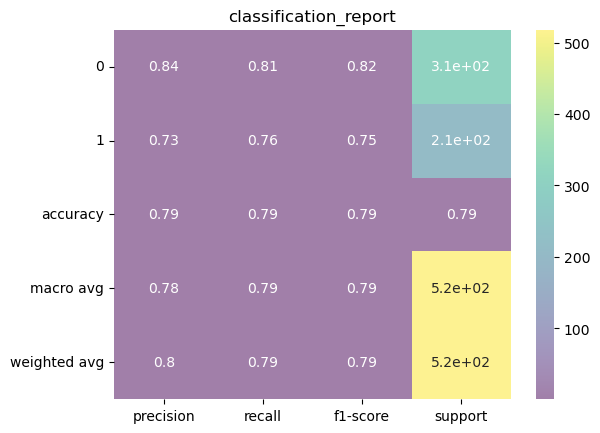

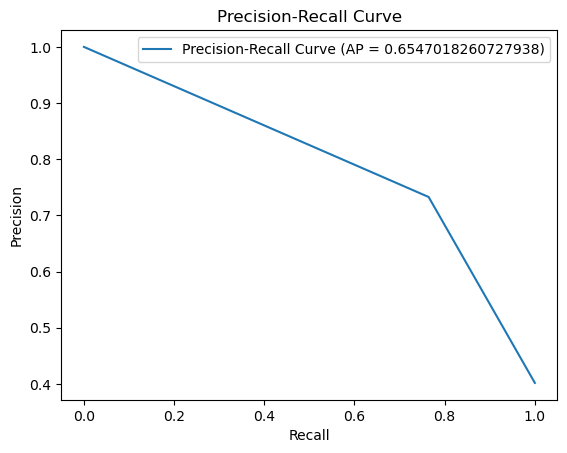

c:\Users\waleed\Downloads\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


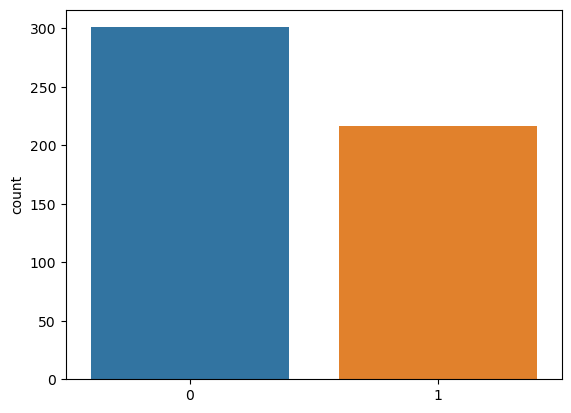

In [57]:
visualize(conf_dt,roc_dt,class_dt,y_test,dt_pred)


## 4- SVC

### Calling The GridsearchCV function

In [58]:
from sklearn.svm import SVC
svc= SVC()
param={'kernel':['rbf','linear','poly'],'C':[0.1,1,10],'gamma':[0.1,0.5,0.7]}
gridsearch(svc,param,x_train_pca,y_train)

{'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}


### Calling the Metrics Function

In [59]:
svc=SVC(kernel='rbf',C=1,gamma=0.7)
svc.fit(x_train_pca,y_train)
svc_pred=svc.predict(x_test_pca)
conf_svc,acc_svc,pre_svc,rec_svc,roc_svc,f1_svc,class_svc=metrics(y_test,svc_pred)


              precision    recall  f1-score   support

           0       0.96      0.99      0.97       310
           1       0.98      0.94      0.96       208

    accuracy                           0.97       518
   macro avg       0.97      0.96      0.97       518
weighted avg       0.97      0.97      0.97       518

[[306   4]
 [ 12 196]]
The Model Accuaracy is : 0.97
The percision score of model is: 0.98
The recall score is :  0.9423076923076923
The roc score is : 0.96
The F1_score of model is : 0.96


### Calling The Visualize Function

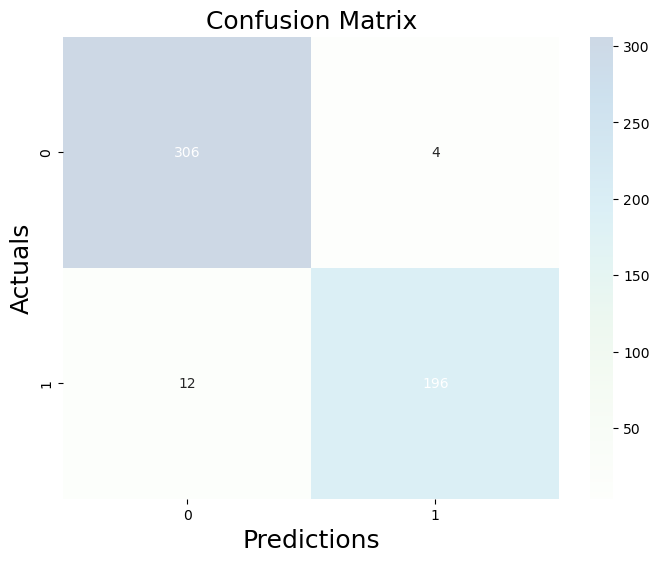

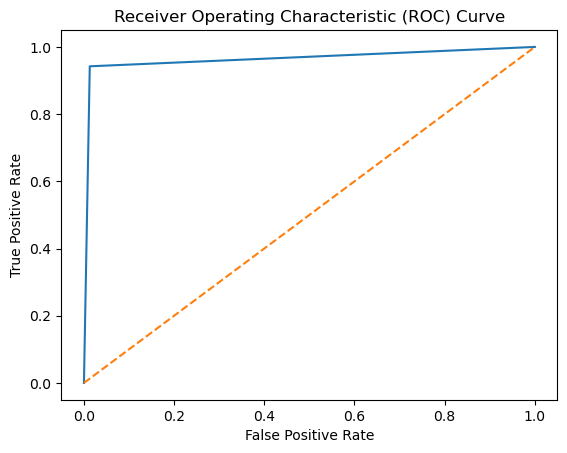

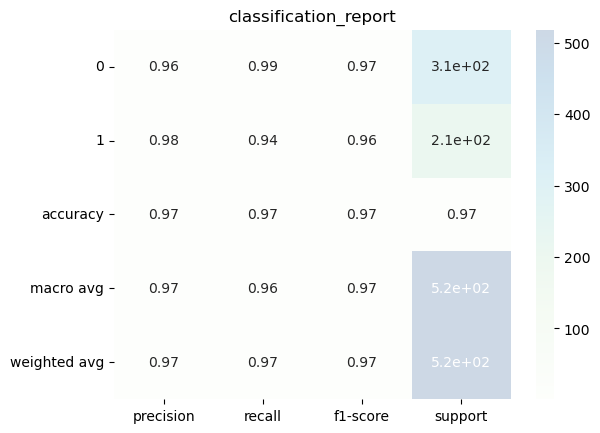

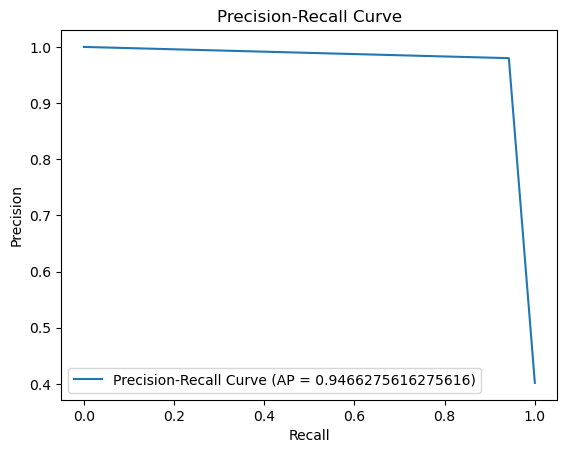

c:\Users\waleed\Downloads\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


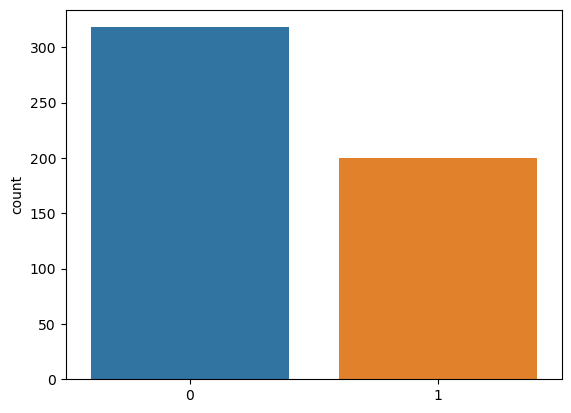

In [60]:
visualize(conf_svc,roc_svc,class_svc,y_test,svc_pred)


## 5- Naive Bayes

### Calling The gridSearchCV function

In [61]:
from sklearn.naive_bayes import GaussianNB

nav= GaussianNB()
param = {'priors': [None, [0.2, 0.3, 0.5], [0.3, 0.3, 0.4]]}
gridsearch(nav,param,x_train_pca,y_train)

{'priors': None}


c:\Users\waleed\Downloads\New folder\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\waleed\Downloads\New folder\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\waleed\Downloads\New folder\lib\site-packages\sklearn\naive_bayes.py", line 245, in fit
    return self._partial_fit(
  File "c:\Users\waleed\Downloads\New folder\lib\site-packages\sklearn\naive_bayes.py", line 428, in _partial_fit
    raise ValueError("Number of prior

### calling The metrics Function

In [62]:
nav=GaussianNB(priors=None)
nav.fit(x_train_pca,y_train)
nav_pred=nav.predict(x_test_pca)
conf_nav,acc_nav,pre_nav,rec_nav,roc_nav,f1_nav,class_nav=metrics(y_test,nav_pred)



              precision    recall  f1-score   support

           0       0.74      0.86      0.80       310
           1       0.73      0.54      0.62       208

    accuracy                           0.74       518
   macro avg       0.73      0.70      0.71       518
weighted avg       0.73      0.74      0.73       518

[[268  42]
 [ 95 113]]
The Model Accuaracy is : 0.74
The percision score of model is: 0.73
The recall score is :  0.5432692307692307
The roc score is : 0.70
The F1_score of model is : 0.62


### Calling Visualize Function

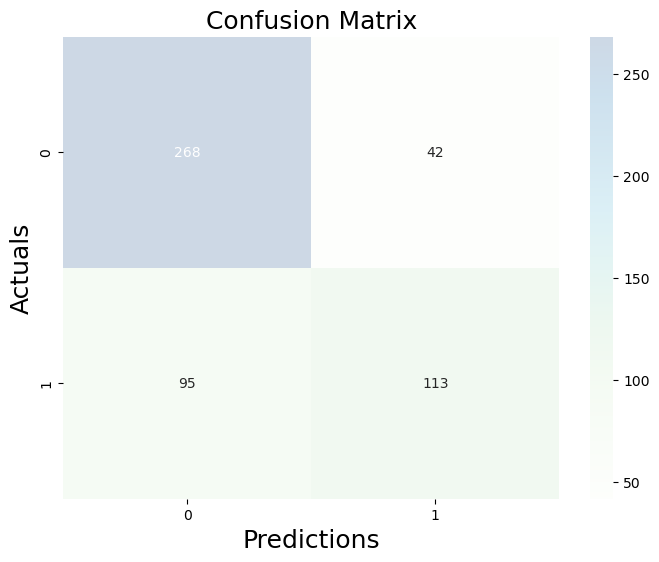

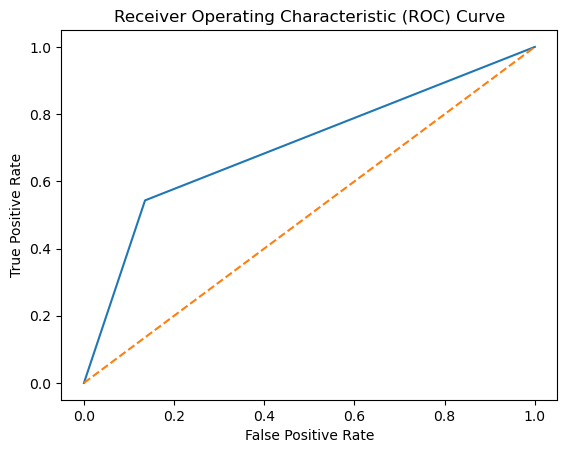

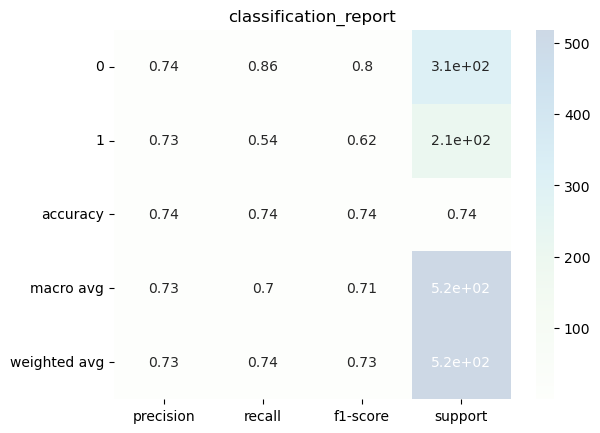

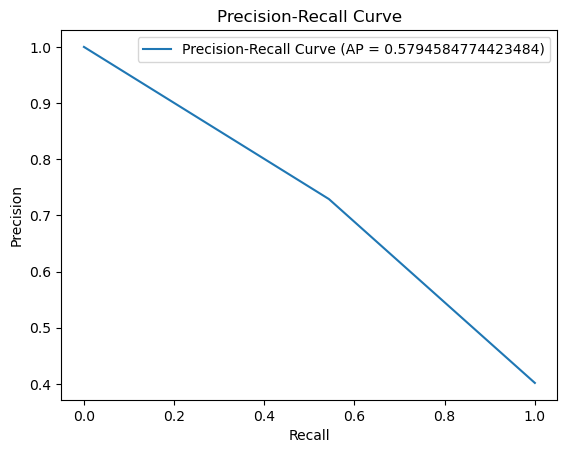

c:\Users\waleed\Downloads\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


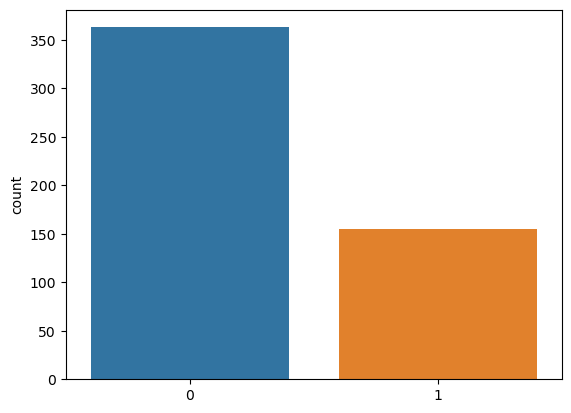

In [63]:
visualize(conf_nav,roc_nav,class_nav,y_test,nav_pred)


## 6- RandomForrest

### Calling GridSearchcv

In [64]:
from sklearn.ensemble import RandomForestClassifier
rt = RandomForestClassifier()
param={'n_estimators':[3,5,7,10],'criterion':['gini','entropy'],'max_depth':[3,5,7,10,15],'max_samples':[100,500,900,1000,1200]}
gridsearch(rt,param,x_train_pca,y_train)

{'criterion': 'entropy', 'max_depth': 15, 'max_samples': 900, 'n_estimators': 10}


c:\Users\waleed\Downloads\New folder\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
400 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\waleed\Downloads\New folder\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\waleed\Downloads\New folder\lib\site-packages\sklearn\ensemble\_forest.py", line 385, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "c:\Users\waleed\Downloads\New folder\lib\site-packages\sklearn\ensemble\_forest.py", line 111, in _get_n_samples_

### Calling The Metrics Fuction

In [65]:
rt = RandomForestClassifier(criterion='entropy',max_depth=15,n_estimators=10,bootstrap=True,max_samples=500,n_jobs=-1)
rt.fit(x_train_pca,y_train)
rt_pred=rt.predict(x_test_pca)
conf_rt,acc_rt,pre_rt,rec_rt,roc_rt,f1_rt,class_rt=metrics(y_test,rt_pred)


              precision    recall  f1-score   support

           0       0.94      0.88      0.91       310
           1       0.84      0.92      0.88       208

    accuracy                           0.90       518
   macro avg       0.89      0.90      0.89       518
weighted avg       0.90      0.90      0.90       518

[[273  37]
 [ 17 191]]
The Model Accuaracy is : 0.90
The percision score of model is: 0.84
The recall score is :  0.9182692307692307
The roc score is : 0.90
The F1_score of model is : 0.88


### Calling The visualize Function

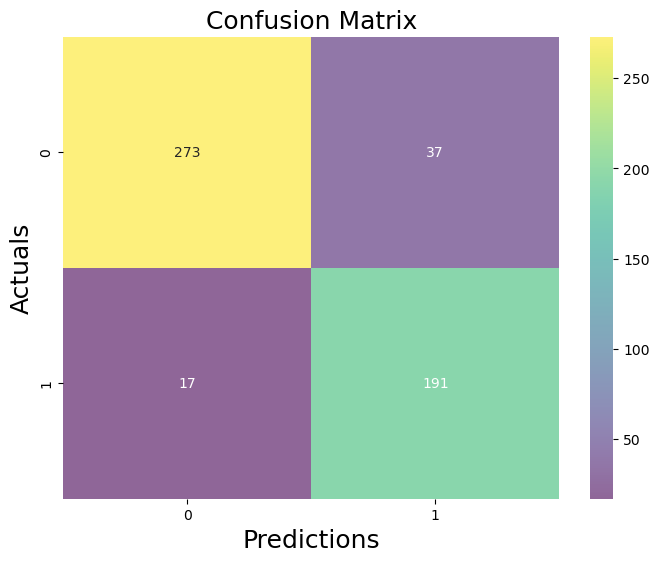

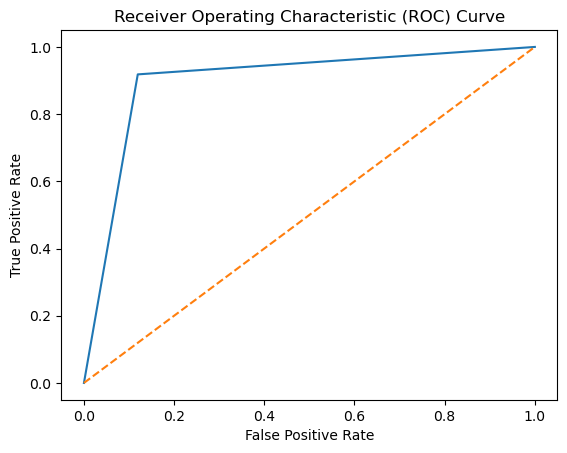

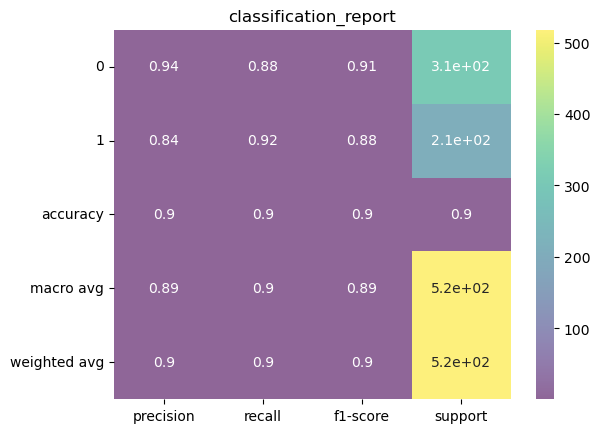

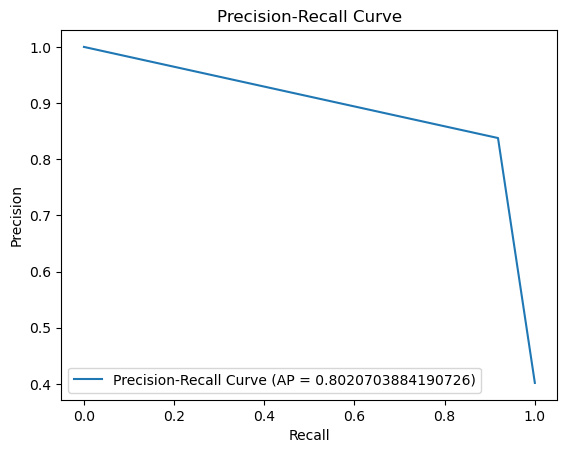

c:\Users\waleed\Downloads\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


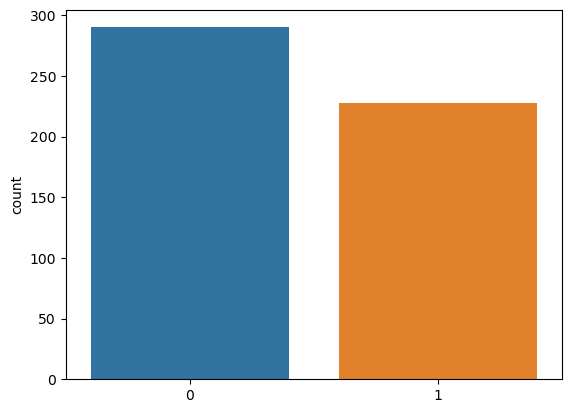

In [66]:
visualize(conf_rt,roc_rt,class_rt,y_test,rt_pred)


## 7- Bagging Ensemble

In [67]:
from sklearn.ensemble import BaggingClassifier,VotingClassifier,AdaBoostClassifier
est1=[('dt',DecisionTreeClassifier()),('svc',SVC())]
est2= [('dt',DecisionTreeClassifier()),('knn',KNeighborsClassifier()),('log',LogisticRegression())]
vote1=VotingClassifier(estimators=est1)
vote2=VotingClassifier(estimators=est2)


bag=BaggingClassifier()
param={'n_estimators':[100,200,300,400,500],'base_estimator':[vote1,vote2],'max_samples':[100,400,500]}
gridsearch(bag,param,x_train_pca,y_train)

c:\Users\waleed\Downloads\New folder\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\waleed\Downloads\New folder\lib\site-packages\sklearn\ensemble\_base.py", line 31, in _fit_single_estimator
    estimator.fit(X, y, sample_weight=sample_weight)
TypeError: fit() got an unexpected keyword argument 'sample_weight'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\waleed\Downloads\New folder\lib\site-packages\sklearn\model_selection\_validation.py", line 680, i

{'base_estimator': VotingClassifier(estimators=[('dt', DecisionTreeClassifier()), ('svc', SVC())]), 'max_samples': 500, 'n_estimators': 100}


### Calling The Metrics Function

In [68]:
bag= BaggingClassifier(base_estimator=vote1,max_samples=500,n_jobs=-1,n_estimators=300)
bag.fit(x_train_pca,y_train)
bag_pred=bag.predict(x_test_pca)
conf_bag,acc_bag,pre_bag,rec_bag,roc_bag,f1_bag,class_bag=metrics(y_test,bag_pred)


              precision    recall  f1-score   support

           0       0.85      0.95      0.89       310
           1       0.91      0.75      0.82       208

    accuracy                           0.87       518
   macro avg       0.88      0.85      0.86       518
weighted avg       0.87      0.87      0.86       518

[[294  16]
 [ 53 155]]
The Model Accuaracy is : 0.87
The percision score of model is: 0.91
The recall score is :  0.7451923076923077
The roc score is : 0.85
The F1_score of model is : 0.82


### Calling The visualize Function

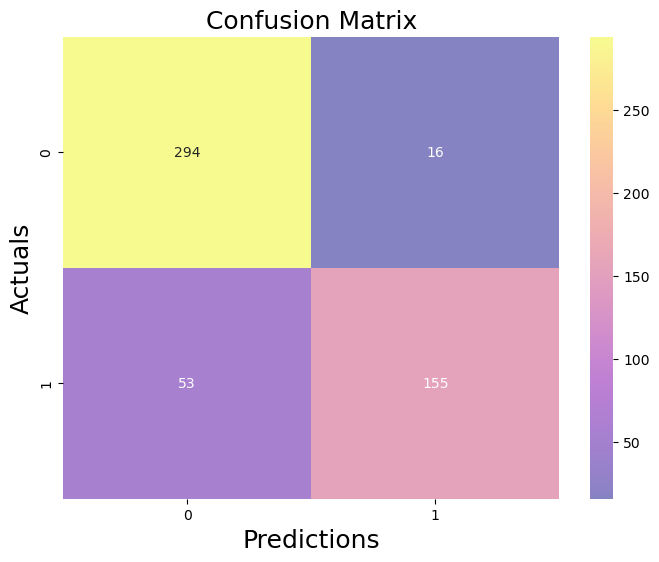

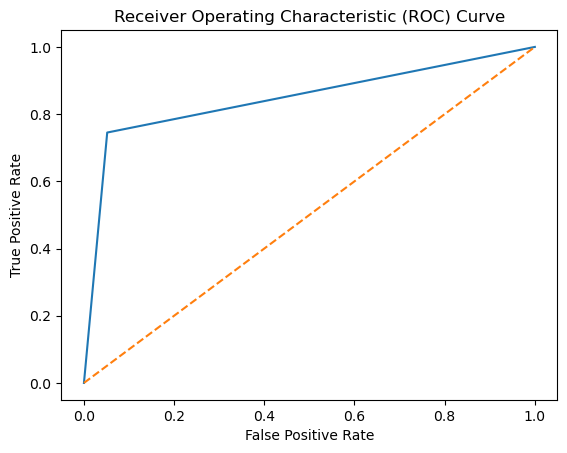

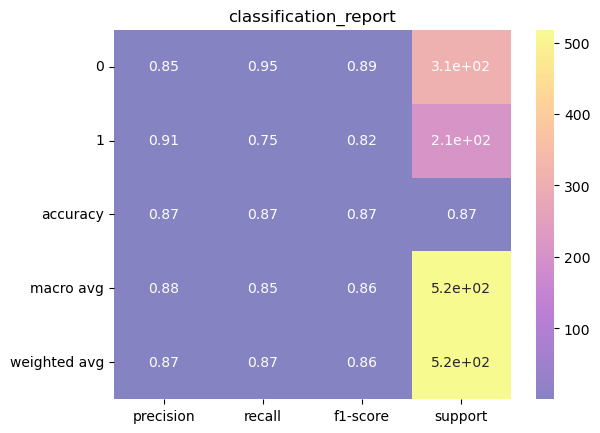

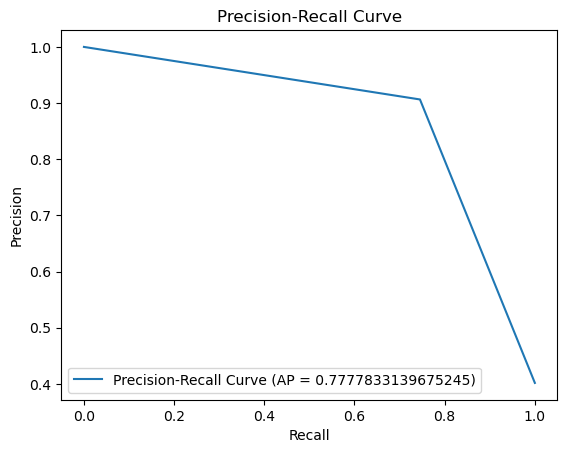

c:\Users\waleed\Downloads\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


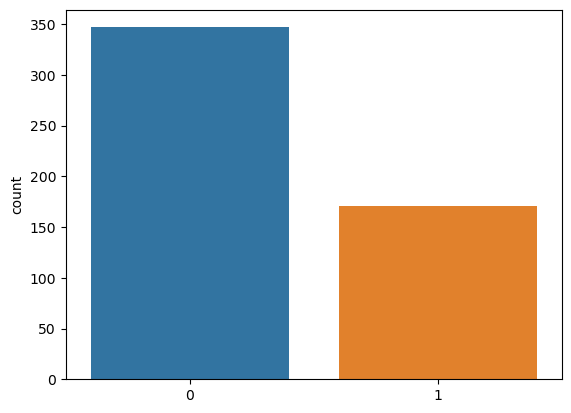

In [69]:
visualize(conf_bag,roc_bag,class_bag,y_test,bag_pred)


## 8- ADABoost classifier

In [70]:
est1=[('dt',DecisionTreeClassifier()),('svc',SVC()),('rt',RandomForestClassifier())]
est2= [('dt',DecisionTreeClassifier()),('knn',KNeighborsClassifier()),('log',LogisticRegression())]
vote1=VotingClassifier(estimators=est1)
vote2=VotingClassifier(estimators=est2)
ada= AdaBoostClassifier()
param={'n_estimators':[50,70,100],'base_estimator':[vote1,vote2],'learning_rate':[0.1,0.2,0.3],'algorithm':['SAMME.R','SAMME']}
gridsearch(ada,param,x_train_pca,y_train)

c:\Users\waleed\Downloads\New folder\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
135 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\waleed\Downloads\New folder\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\waleed\Downloads\New folder\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 486, in fit
    return super().fit(X, y, sample_weight)
  File "c:\Users\waleed\Downloads\New folder\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 132, in fit
  

{'algorithm': 'SAMME', 'base_estimator': VotingClassifier(estimators=[('dt', DecisionTreeClassifier()), ('svc', SVC()),
                             ('rt', RandomForestClassifier())]), 'learning_rate': 0.1, 'n_estimators': 100}


### Calling the Metrics Function

In [71]:
ada= AdaBoostClassifier(base_estimator=vote1,learning_rate=0.2,n_estimators=50,algorithm='SAMME' )
ada.fit(x_train_pca,y_train)
ada_pred=ada.predict(x_test_pca)
conf_ada,acc_ada,pre_ada,rec_ada,roc_ada,f1_ada,class_ada=metrics(y_test,ada_pred)



              precision    recall  f1-score   support

           0       0.97      0.97      0.97       310
           1       0.96      0.96      0.96       208

    accuracy                           0.97       518
   macro avg       0.97      0.97      0.97       518
weighted avg       0.97      0.97      0.97       518

[[302   8]
 [  9 199]]
The Model Accuaracy is : 0.97
The percision score of model is: 0.96
The recall score is :  0.9567307692307693
The roc score is : 0.97
The F1_score of model is : 0.96


### Calling The Visualize Function

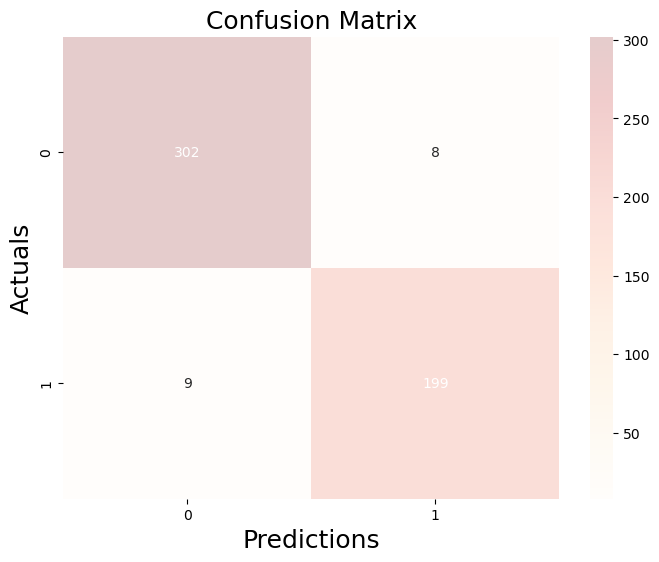

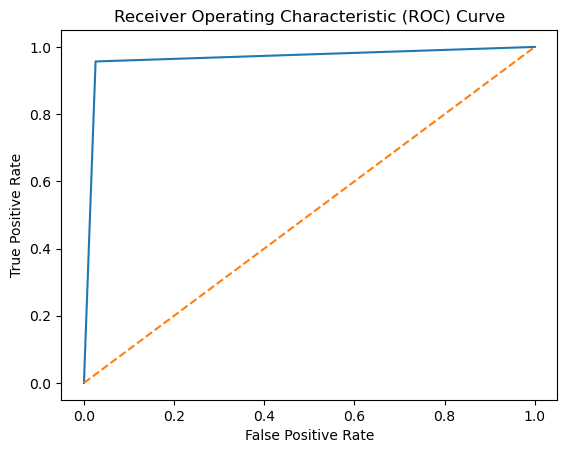

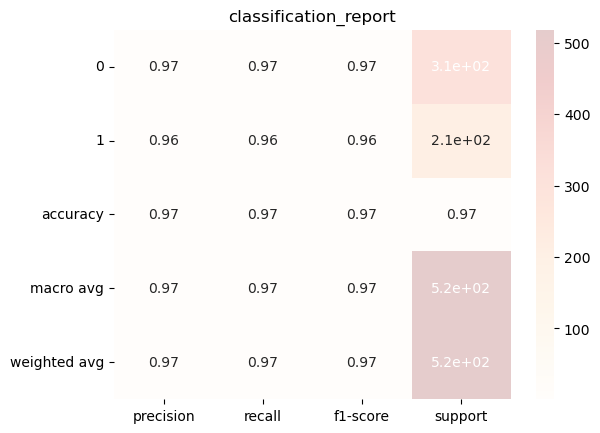

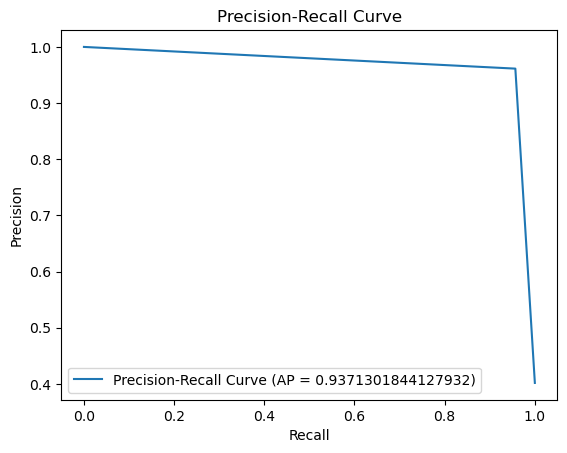

c:\Users\waleed\Downloads\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


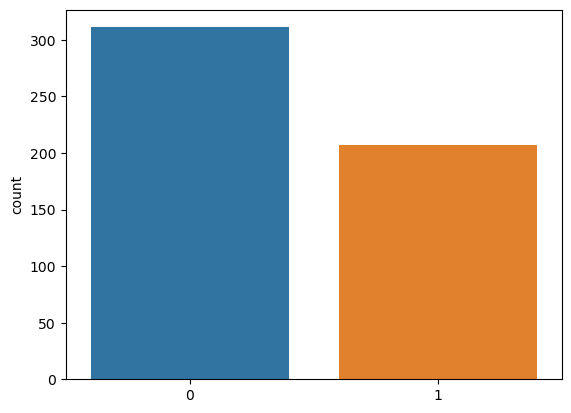

In [72]:
visualize(conf_ada,roc_ada,class_ada,y_test,ada_pred)


## 9- GradientBoosting

### Calling GridsearchCV Function

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier()

param = {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 5, 10]}
gridsearch(grad,param,x_train_pca,y_train)

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}


### Calling the Metrics Function

In [74]:
grad=GradientBoostingClassifier(n_estimators=150,learning_rate=0.2,max_depth=5)
grad.fit(x_train_pca,y_train)
grad_pred=grad.predict(x_test_pca)
conf_grad,acc_grad,pre_grad,rec_grad,roc_grad,f1_grad,class_grad=metrics(y_test,grad_pred)


              precision    recall  f1-score   support

           0       0.97      0.92      0.95       310
           1       0.89      0.96      0.92       208

    accuracy                           0.94       518
   macro avg       0.93      0.94      0.93       518
weighted avg       0.94      0.94      0.94       518

[[286  24]
 [  9 199]]
The Model Accuaracy is : 0.94
The percision score of model is: 0.89
The recall score is :  0.9567307692307693
The roc score is : 0.94
The F1_score of model is : 0.92


### Calling The visualize Function

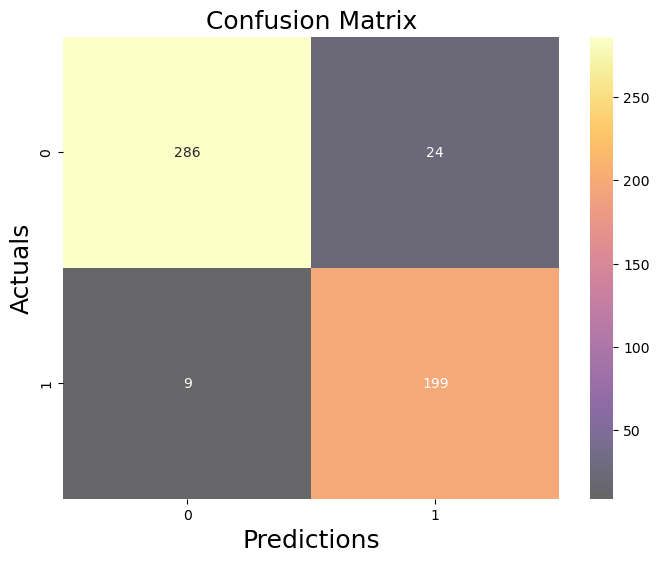

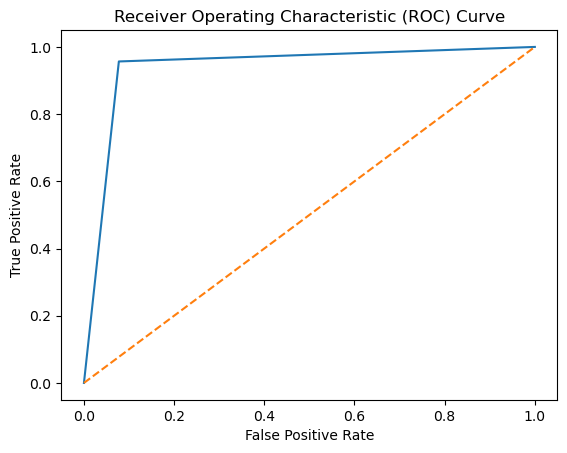

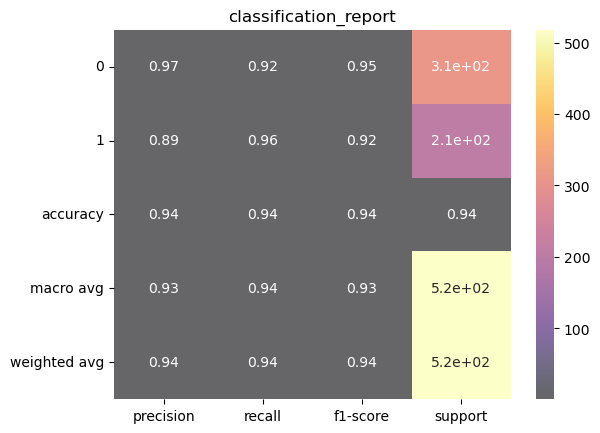

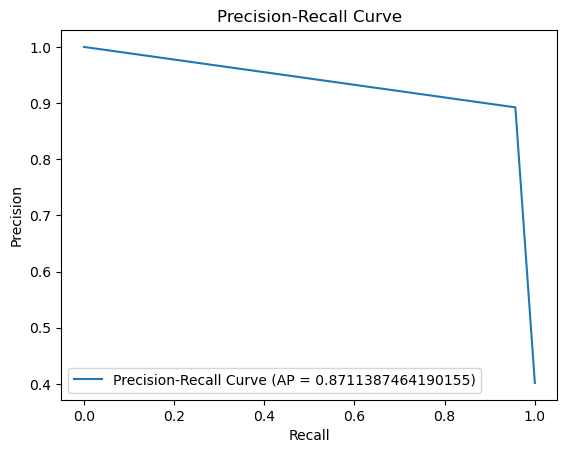

c:\Users\waleed\Downloads\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


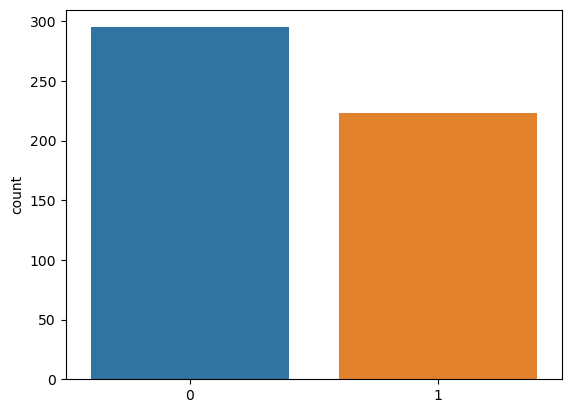

In [75]:
visualize(conf_grad,roc_grad,class_grad,y_test,grad_pred)


## 10- XGBOOST

### calling the GridsearchCV

In [76]:
from xgboost import XGBClassifier
xg = XGBClassifier(objective='multi:softmax', num_class=10, random_state=42)
param = {'learning_rate': [ 0.1, 0.3,0.4], 'max_depth': [5, 7, 10,15], 'n_estimators': [100, 150, 200]}
gridsearch(xg,param,x_train_pca,y_train)

{'learning_rate': 0.4, 'max_depth': 15, 'n_estimators': 200}


### Calling The Metrics Functions

In [77]:
xg = XGBClassifier(objective='multi:softmax', num_class=10, random_state=42,n_estimators=200,max_depth=5,learning_rate=0.1)
xg.fit(x_train_pca,y_train)
xg_pred=xg.predict(x_test_pca)
conf_xg,acc_xg,pre_xg,rec_xg,roc_xg,f1_xg,class_xg=metrics(y_test,xg_pred)


              precision    recall  f1-score   support

           0       0.98      0.90      0.93       310
           1       0.86      0.97      0.91       208

    accuracy                           0.92       518
   macro avg       0.92      0.93      0.92       518
weighted avg       0.93      0.92      0.93       518

[[278  32]
 [  7 201]]
The Model Accuaracy is : 0.92
The percision score of model is: 0.86
The recall score is :  0.9663461538461539
The roc score is : 0.93
The F1_score of model is : 0.91


### Calling The visualize Function

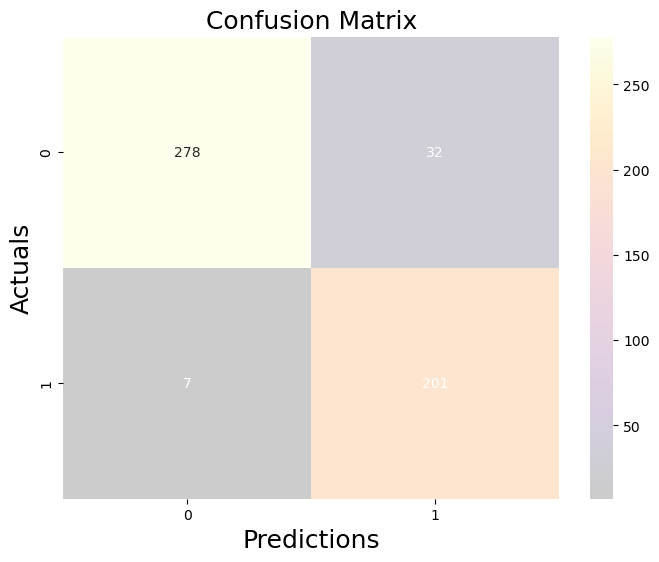

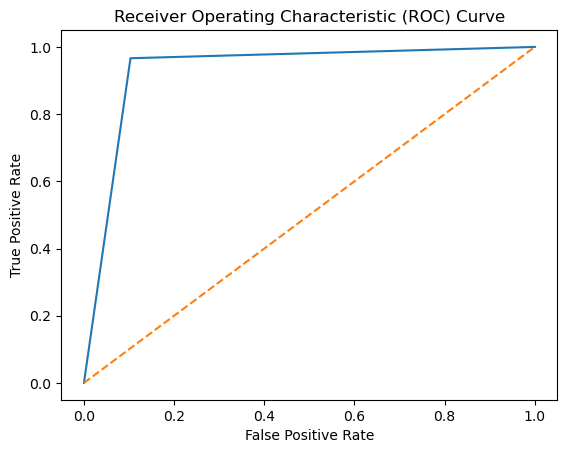

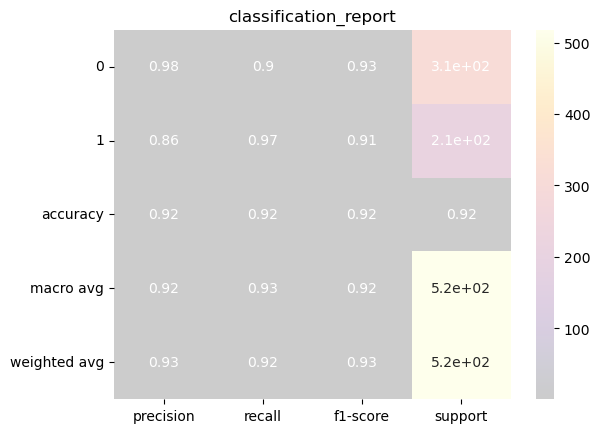

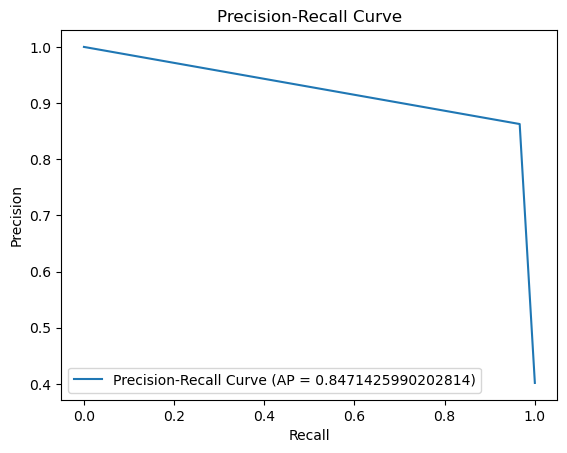

c:\Users\waleed\Downloads\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


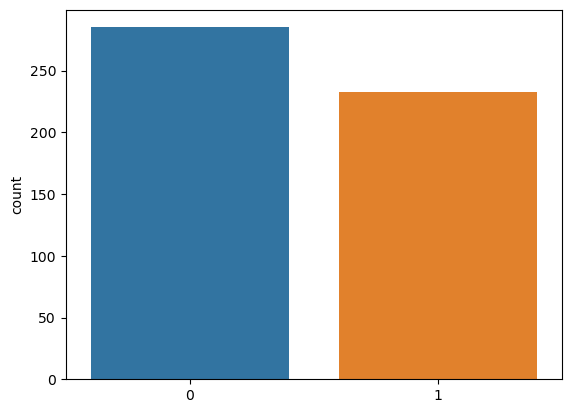

In [78]:
visualize(conf_xg,roc_xg,class_xg,y_test,xg_pred)


# Comparsion Between Models

## Comparsion Function

In [79]:
def Comparsion(model,sco,title):
    plt.figure(figsize=(15,10))
    sns.barplot(x=model,y=sco)
    plt.xlabel('Models')
    plt.ylabel('score')
    plt.title(title)
    plt.xticks(rotation=90)

### Comparsion According Accuracy

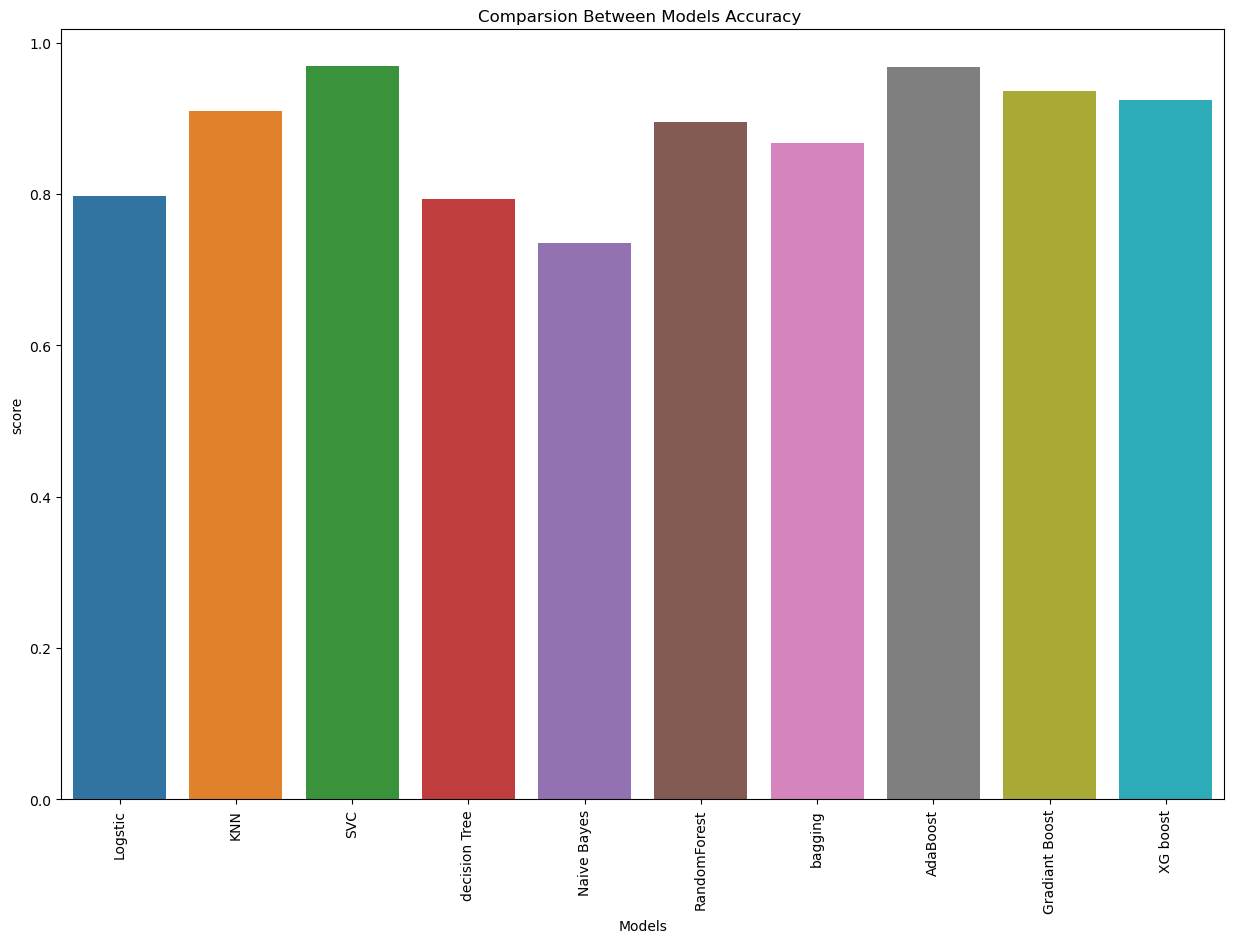

In [80]:
models=['Logstic','KNN','SVC','decision Tree','Naive Bayes','RandomForest','bagging','AdaBoost','Gradiant Boost','XG boost']
acc_sco=[acc_log,acc_knn,acc_svc,acc_dt,acc_nav,acc_rt,acc_bag,acc_ada,acc_grad,acc_xg]
title='Comparsion Between Models Accuracy '
Comparsion(models,acc_sco,title)

### Comparsion According percision Score

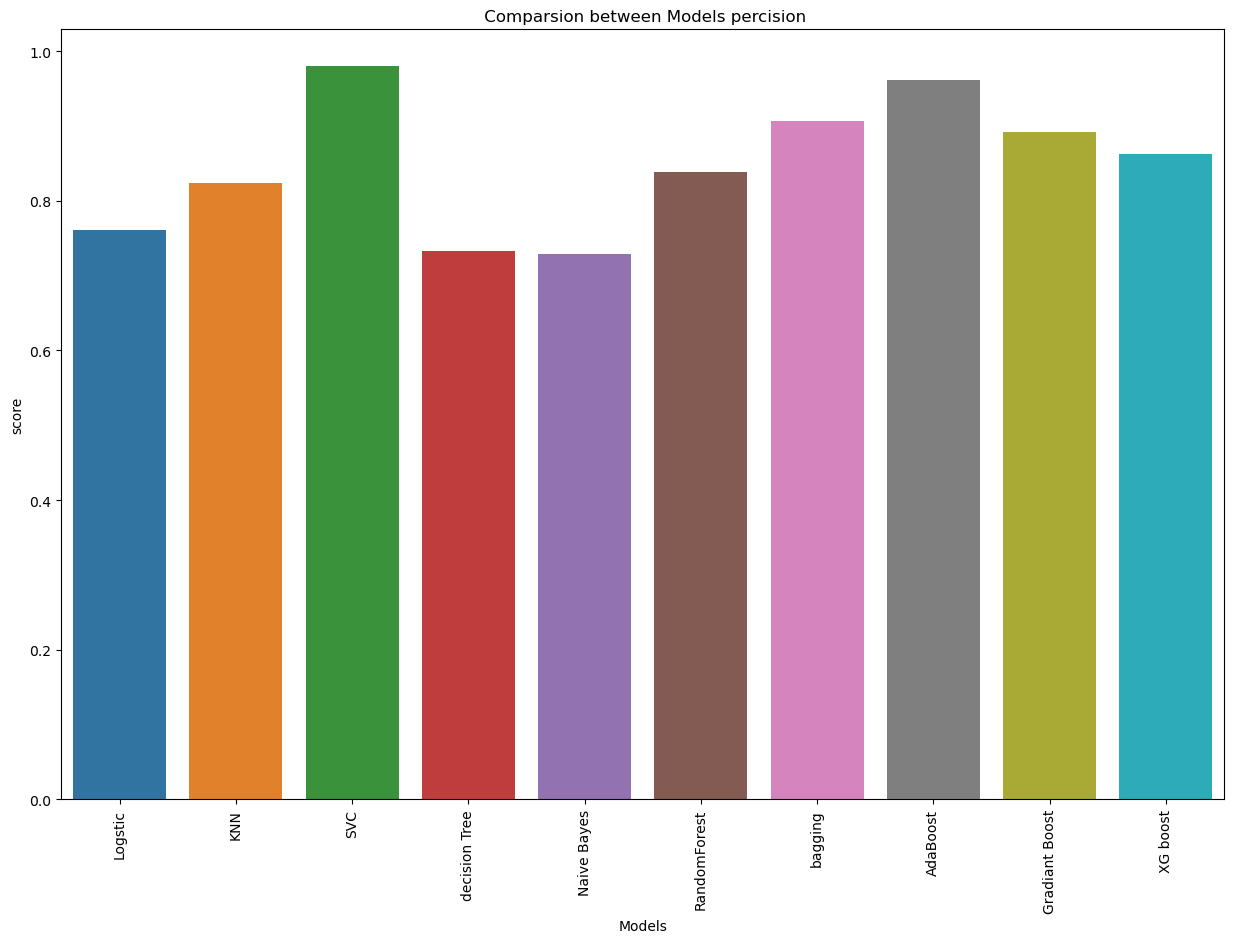

In [81]:
pre_sco=[pre_log,pre_knn,pre_svc,pre_dt,pre_nav,pre_rt,pre_bag,pre_ada,pre_grad,pre_xg]
title=' Comparsion between Models percision'
Comparsion(models,pre_sco,title)

### Comparsion According Recall  Score

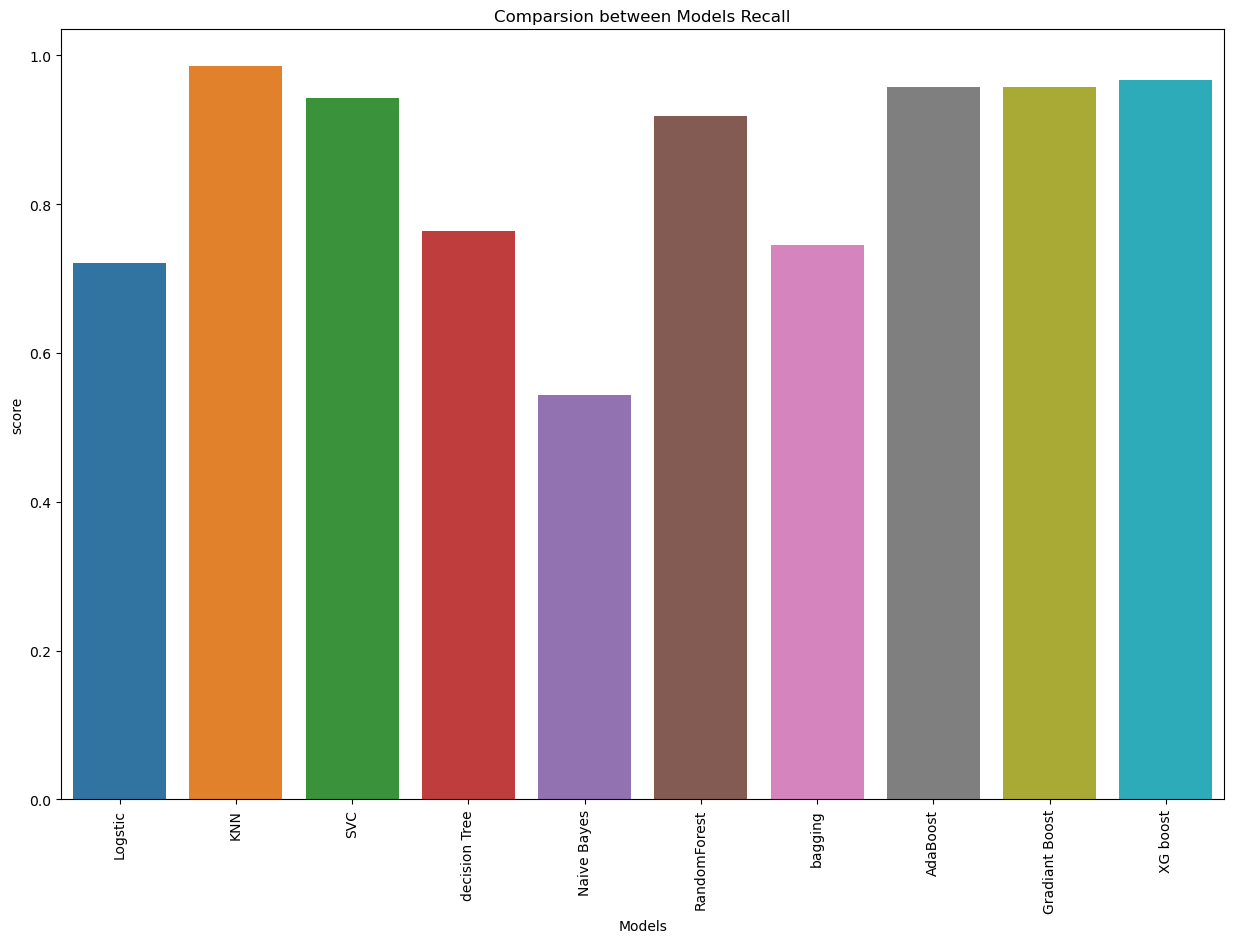

In [82]:
rec_sco=[rec_log,rec_knn,rec_svc,rec_dt,rec_nav,rec_rt,rec_bag,rec_ada,rec_grad,rec_xg]
title= 'Comparsion between Models Recall'
Comparsion(models,rec_sco,title)

### Comparsion according F1_SCORE

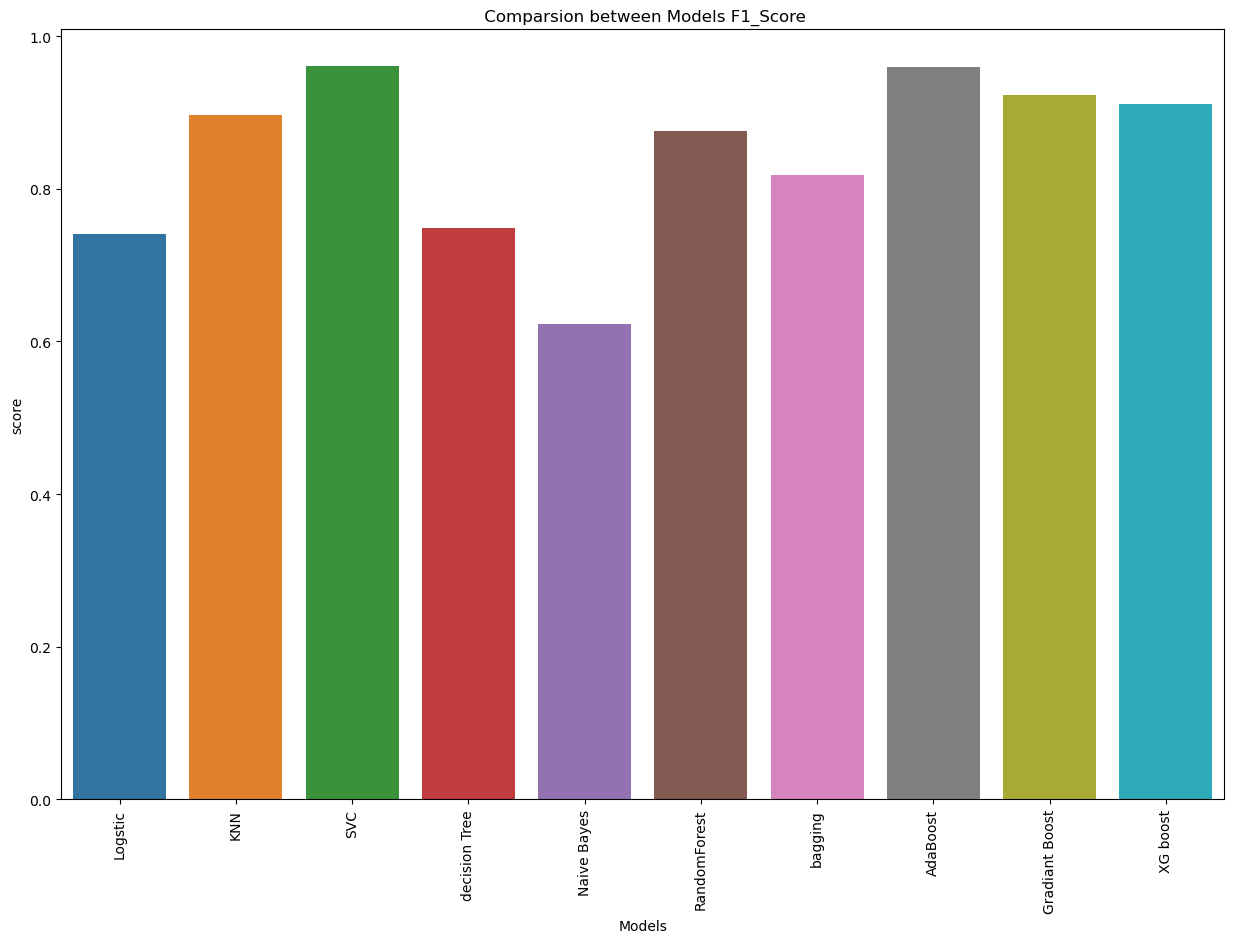

In [83]:
f1_sco=[f1_log,f1_knn,f1_svc,f1_dt,f1_nav,f1_rt,f1_bag,f1_ada,f1_grad,f1_xg]
title= ' Comparsion between Models F1_Score'
Comparsion(models,f1_sco,title)

### Comparsion according ROC_SCORE

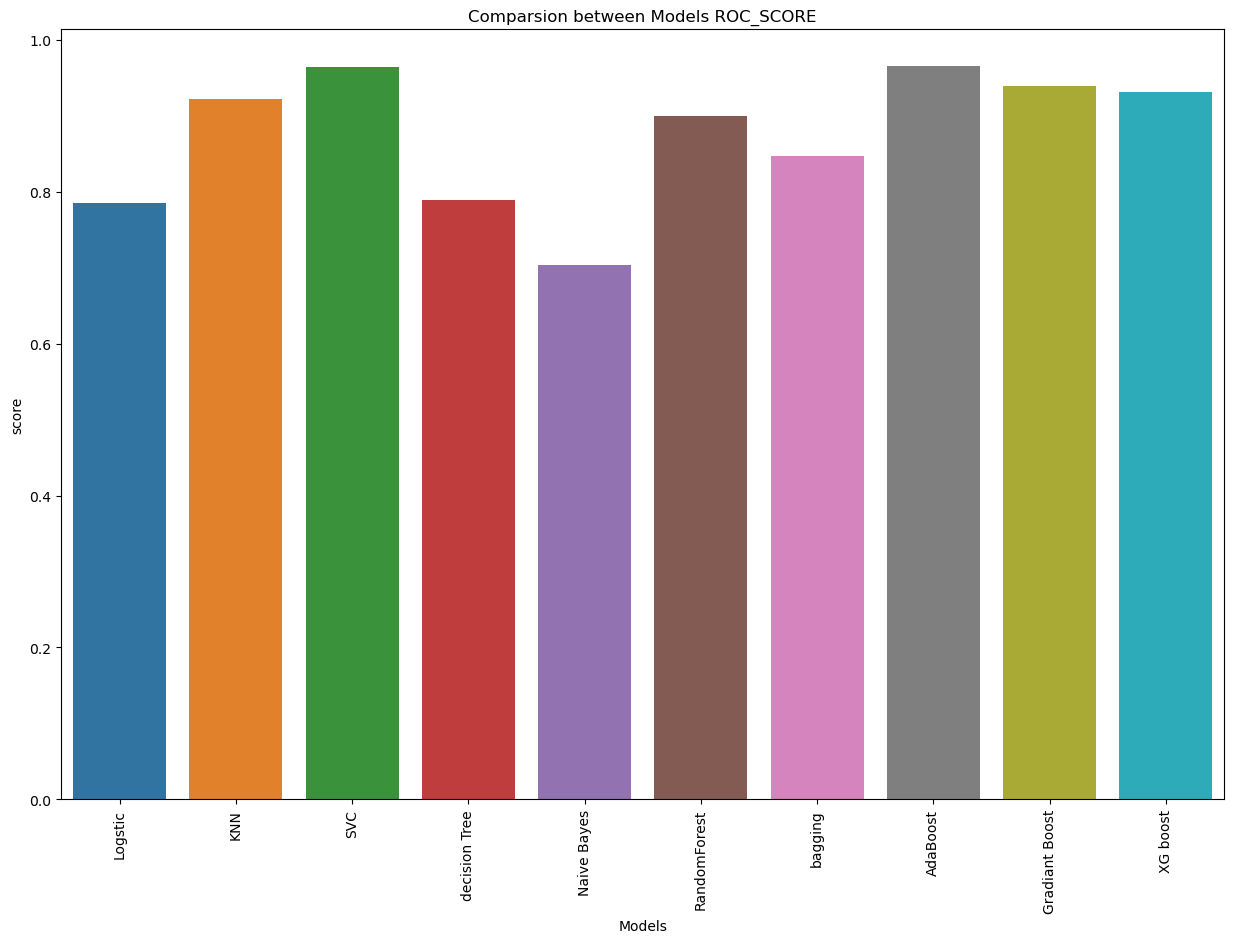

In [84]:
ROC_sco=[roc_log,roc_knn,roc_svc,roc_dt,roc_nav,roc_rt,roc_bag,roc_ada,roc_grad,roc_xg]
title='Comparsion between Models ROC_SCORE'
Comparsion(models,ROC_sco,title)

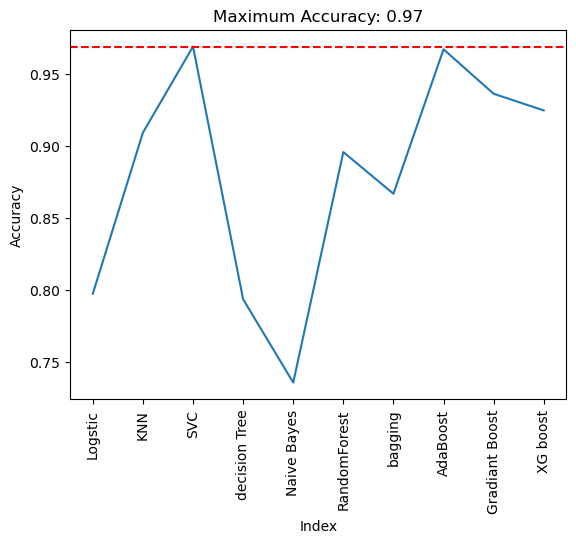

In [86]:



plt.plot(models, acc_sco)
plt.xticks(rotation=90)
max_accuracy = max(acc_sco)
plt.axhline(y=max_accuracy, color='r', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Accuracy')
plt.title('Maximum Accuracy: {:.2f}'.format(max_accuracy))

plt.show()

# Finally The SVC has Max Accuaracy